In [1]:
#import illustris_python as il
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import xgboost as xgb
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
from kmodes.kmodes import KModes
from sklearn.utils import resample
from sklearn.metrics import log_loss, recall_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.layers import Dropout

2023-09-14 17:48:11.371163: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 17:48:11.442478: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 17:48:11.443493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 17:48:13.309324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
#warning ignorer
import warnings
warnings.filterwarnings("ignore")

In [21]:
#import files
df1 = pd.read_csv('z=1.csv', low_memory=False)
df2 = pd.read_csv('z=0_5.csv', low_memory=False)
df3 = pd.read_csv('z=0.csv', low_memory=False)
df1.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity
0,199097,44.350290,44.350290,0.000000,-0.611396,24.095618,8.774169,0.012307,-22.445345,0.002076,85.263086
1,210307,43.252561,43.252561,0.414761,-0.348660,22.997890,8.478360,0.012681,-23.001787,0.000328,8.115126
2,212195,44.126306,44.126306,0.247022,4.219759,23.871635,8.609567,0.008637,-22.212519,0.001811,79.843288
3,222547,43.732386,43.732386,0.000000,2.245786,23.477714,8.629783,0.010330,-22.015049,0.000698,-47.528029
4,223589,43.102978,43.102978,0.293753,3.240826,22.848307,8.642096,0.009274,-22.436623,0.000159,71.932080


In [22]:
df2.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity
0,277421,42.390410,42.390410,0.000000,0.712365,22.135738,8.806909,0.007061,-21.317524,0.000021,-16.198083
1,288670,42.248388,42.248388,0.000000,2.245969,21.993716,8.782714,0.007555,-21.209230,0.000016,67.220735
2,300406,43.203374,43.203374,0.006155,-0.195004,22.948702,8.480515,0.019302,-21.741426,0.000291,-17.682234
3,303392,42.734616,42.734616,1.307634,2.007947,22.479944,8.456201,0.017902,-22.679466,0.000105,9.773245
4,313327,43.462448,43.462448,0.000000,1.354211,23.207776,8.438592,0.014544,-21.563463,0.000582,85.872516


In [23]:
df3.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity
0,356678,43.172570,43.172570,0.0,-0.933217,22.917899,8.905789,0.000000,-21.000128,0.000102,37.693491
1,359811,42.544454,42.544454,0.0,-1.404874,22.289783,9.003120,0.005017,-20.239038,0.000019,-28.303080
2,377398,42.564474,42.564474,0.0,0.805930,22.309802,8.776723,0.013295,-20.981514,0.000034,59.498937
3,381608,41.487624,41.487624,0.0,0.321204,21.232953,8.836200,0.000000,-20.463696,0.000002,68.970768
4,384914,42.692935,42.692935,0.0,-0.319989,22.438263,8.741881,0.005737,-20.651108,0.000049,4.116418


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   E_feed                   9814 non-null   float64
 2   L_bol                    9814 non-null   float64
 3   SFRinhalfrad             10000 non-null  float64
 4   Average divergence       10000 non-null  float64
 5   Bhmdot                   10000 non-null  float64
 6   Blackhole Masses         10000 non-null  float64
 7   MSFR                     10000 non-null  float64
 8   UV_Band                  10000 non-null  float64
 9   λ                        9814 non-null   float64
 10  Average radial velocity  10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [25]:
# Check for NaN values
nan_values = df1.isnull().sum()
print(nan_values)
print()
# Check for infinite values
inf_values = df1.apply(lambda x: np.isinf(x).sum())
print(inf_values)
print()
# Check for 0 values
zero_values = (df1 == 0).sum()
print(zero_values)

ID                           0
E_feed                     186
L_bol                      186
SFRinhalfrad                 0
Average divergence           0
Bhmdot                       0
Blackhole Masses             0
MSFR                         0
UV_Band                      0
λ                          186
Average radial velocity      0
dtype: int64

ID                           0
E_feed                       0
L_bol                        0
SFRinhalfrad                 0
Average divergence           0
Bhmdot                     186
Blackhole Masses           186
MSFR                         0
UV_Band                      0
λ                            0
Average radial velocity      0
dtype: int64

ID                           0
E_feed                       0
L_bol                        0
SFRinhalfrad               124
Average divergence           0
Bhmdot                       0
Blackhole Masses             0
MSFR                        12
UV_Band                      0
λ          

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   E_feed                   9896 non-null   float64
 2   L_bol                    9896 non-null   float64
 3   SFRinhalfrad             10000 non-null  float64
 4   Average divergence       9994 non-null   float64
 5   Bhmdot                   10000 non-null  float64
 6   Blackhole Masses         10000 non-null  float64
 7   MSFR                     10000 non-null  float64
 8   UV_Band                  10000 non-null  float64
 9   λ                        9896 non-null   float64
 10  Average radial velocity  10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [27]:
# Check for NaN values
nan_values = df2.isnull().sum()
print(nan_values)
print()
# Check for infinite values
inf_values = df2.apply(lambda x: np.isinf(x).sum())
print(inf_values)
print()
# Check for 0 values
zero_values = (df2 == 0).sum()
print(zero_values)

ID                           0
E_feed                     104
L_bol                      104
SFRinhalfrad                 0
Average divergence           6
Bhmdot                       0
Blackhole Masses             0
MSFR                         0
UV_Band                      0
λ                          104
Average radial velocity      0
dtype: int64

ID                           0
E_feed                       0
L_bol                        0
SFRinhalfrad                 0
Average divergence           0
Bhmdot                     104
Blackhole Masses           104
MSFR                         0
UV_Band                      0
λ                            0
Average radial velocity      0
dtype: int64

ID                           0
E_feed                       0
L_bol                        0
SFRinhalfrad               246
Average divergence           0
Bhmdot                       0
Blackhole Masses             0
MSFR                        88
UV_Band                      0
λ          

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   E_feed                   9929 non-null   float64
 2   L_bol                    9929 non-null   float64
 3   SFRinhalfrad             10000 non-null  float64
 4   Average divergence       9971 non-null   float64
 5   Bhmdot                   10000 non-null  float64
 6   Blackhole Masses         10000 non-null  float64
 7   MSFR                     10000 non-null  float64
 8   UV_Band                  10000 non-null  float64
 9   λ                        9929 non-null   float64
 10  Average radial velocity  10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [29]:
# Check for NaN values
nan_values = df3.isnull().sum()
print(nan_values)
print()
# Check for infinite values
inf_values = df3.apply(lambda x: np.isinf(x).sum())
print(inf_values)
print()
# Check for 0 values
zero_values = (df3 == 0).sum()
print(zero_values)

ID                          0
E_feed                     71
L_bol                      71
SFRinhalfrad                0
Average divergence         29
Bhmdot                      0
Blackhole Masses            0
MSFR                        0
UV_Band                     0
λ                          71
Average radial velocity     0
dtype: int64

ID                          0
E_feed                      0
L_bol                       0
SFRinhalfrad                0
Average divergence          0
Bhmdot                     71
Blackhole Masses           71
MSFR                        0
UV_Band                     0
λ                           0
Average radial velocity     0
dtype: int64

ID                           0
E_feed                       0
L_bol                        0
SFRinhalfrad               586
Average divergence           0
Bhmdot                       0
Blackhole Masses             0
MSFR                       302
UV_Band                      0
λ                            0
Av

In [30]:
# Replace inf and -inf with NaN
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df3.replace([np.inf, -np.inf], np.nan, inplace=True)

In [31]:
# Impute missing values with mean
df1 = df1.fillna(df1.mean())

# Check if there are still any missing values
df_1 = df1.isnull().sum()

print(df_1)

# Impute missing values with mean
df2 = df2.fillna(df2.mean())

# Check if there are still any missing values
df_2 = df2.isnull().sum()

print(df_2)

# Impute missing values with mean
df3 = df3.fillna(df3.mean())

# Check if there are still any missing values
df_3 = df3.isnull().sum()

print(df_3)

ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
dtype: int64
ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
dtype: int64
ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
dtype: int64


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   E_feed                   10000 non-null  float64
 2   L_bol                    10000 non-null  float64
 3   SFRinhalfrad             10000 non-null  float64
 4   Average divergence       10000 non-null  float64
 5   Bhmdot                   10000 non-null  float64
 6   Blackhole Masses         10000 non-null  float64
 7   MSFR                     10000 non-null  float64
 8   UV_Band                  10000 non-null  float64
 9   λ                        10000 non-null  float64
 10  Average radial velocity  10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   E_feed                   10000 non-null  float64
 2   L_bol                    10000 non-null  float64
 3   SFRinhalfrad             10000 non-null  float64
 4   Average divergence       10000 non-null  float64
 5   Bhmdot                   10000 non-null  float64
 6   Blackhole Masses         10000 non-null  float64
 7   MSFR                     10000 non-null  float64
 8   UV_Band                  10000 non-null  float64
 9   λ                        10000 non-null  float64
 10  Average radial velocity  10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   E_feed                   10000 non-null  float64
 2   L_bol                    10000 non-null  float64
 3   SFRinhalfrad             10000 non-null  float64
 4   Average divergence       10000 non-null  float64
 5   Bhmdot                   10000 non-null  float64
 6   Blackhole Masses         10000 non-null  float64
 7   MSFR                     10000 non-null  float64
 8   UV_Band                  10000 non-null  float64
 9   λ                        10000 non-null  float64
 10  Average radial velocity  10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


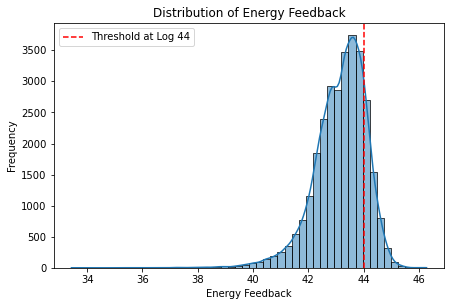

In [43]:
# Add 'z' column
df1['z'] = 0
df2['z'] = 0.5
df3['z'] = 1

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Plot the distribution of 'E_feed' variable
plt.figure(figsize=(7, 4.5))
sns.histplot(df['E_feed'], kde=True, bins=50)
plt.axvline(44, color='red', linestyle='--', label="Threshold at Log 44")
plt.title("Distribution of Energy Feedback")
plt.xlabel("Energy Feedback")
plt.ylabel("Frequency")
plt.legend()
plt.savefig('Energy Feedback.png')
plt.show()

In [44]:
# Save to CSV file
df1.to_csv('z_1.csv', index=False)
df2.to_csv('z_0_5.csv', index=False)
df3.to_csv('z_0.csv', index=False)

In [45]:
#import files
df1 = pd.read_csv('z_1.csv', low_memory=False)
df2 = pd.read_csv('z_0_5.csv', low_memory=False)
df3 = pd.read_csv('z_0.csv', low_memory=False)
df1.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity,z
0,199097,44.350290,44.350290,0.000000,-0.611396,24.095618,8.774169,0.012307,-22.445345,0.002076,85.263086,0
1,210307,43.252561,43.252561,0.414761,-0.348660,22.997890,8.478360,0.012681,-23.001787,0.000328,8.115126,0
2,212195,44.126306,44.126306,0.247022,4.219759,23.871635,8.609567,0.008637,-22.212519,0.001811,79.843288,0
3,222547,43.732386,43.732386,0.000000,2.245786,23.477714,8.629783,0.010330,-22.015049,0.000698,-47.528029,0
4,223589,43.102978,43.102978,0.293753,3.240826,22.848307,8.642096,0.009274,-22.436623,0.000159,71.932080,0


In [46]:
df2.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity,z
0,277421,42.390410,42.390410,0.000000,0.712365,22.135738,8.806909,0.007061,-21.317524,0.000021,-16.198083,0.5
1,288670,42.248388,42.248388,0.000000,2.245969,21.993716,8.782714,0.007555,-21.209230,0.000016,67.220735,0.5
2,300406,43.203374,43.203374,0.006155,-0.195004,22.948702,8.480515,0.019302,-21.741426,0.000291,-17.682234,0.5
3,303392,42.734616,42.734616,1.307634,2.007947,22.479944,8.456201,0.017902,-22.679466,0.000105,9.773245,0.5
4,313327,43.462448,43.462448,0.000000,1.354211,23.207776,8.438592,0.014544,-21.563463,0.000582,85.872516,0.5


In [47]:
df3.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity,z
0,356678,43.172570,43.172570,0.0,-0.933217,22.917899,8.905789,0.000000,-21.000128,0.000102,37.693491,1
1,359811,42.544454,42.544454,0.0,-1.404874,22.289783,9.003120,0.005017,-20.239038,0.000019,-28.303080,1
2,377398,42.564474,42.564474,0.0,0.805930,22.309802,8.776723,0.013295,-20.981514,0.000034,59.498937,1
3,381608,41.487624,41.487624,0.0,0.321204,21.232953,8.836200,0.000000,-20.463696,0.000002,68.970768,1
4,384914,42.692935,42.692935,0.0,-0.319989,22.438263,8.741881,0.005737,-20.651108,0.000049,4.116418,1


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   E_feed                   10000 non-null  float64
 2   L_bol                    10000 non-null  float64
 3   SFRinhalfrad             10000 non-null  float64
 4   Average divergence       10000 non-null  float64
 5   Bhmdot                   10000 non-null  float64
 6   Blackhole Masses         10000 non-null  float64
 7   MSFR                     10000 non-null  float64
 8   UV_Band                  10000 non-null  float64
 9   λ                        10000 non-null  float64
 10  Average radial velocity  10000 non-null  float64
 11  z                        10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   E_feed                   10000 non-null  float64
 2   L_bol                    10000 non-null  float64
 3   SFRinhalfrad             10000 non-null  float64
 4   Average divergence       10000 non-null  float64
 5   Bhmdot                   10000 non-null  float64
 6   Blackhole Masses         10000 non-null  float64
 7   MSFR                     10000 non-null  float64
 8   UV_Band                  10000 non-null  float64
 9   λ                        10000 non-null  float64
 10  Average radial velocity  10000 non-null  float64
 11  z                        10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   E_feed                   10000 non-null  float64
 2   L_bol                    10000 non-null  float64
 3   SFRinhalfrad             10000 non-null  float64
 4   Average divergence       10000 non-null  float64
 5   Bhmdot                   10000 non-null  float64
 6   Blackhole Masses         10000 non-null  float64
 7   MSFR                     10000 non-null  float64
 8   UV_Band                  10000 non-null  float64
 9   λ                        10000 non-null  float64
 10  Average radial velocity  10000 non-null  float64
 11  z                        10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [51]:
# Check for NaN values
nan_values = df1.isnull().sum()
print(nan_values)
print()
# Check for infinite values
inf_values = df1.apply(lambda x: np.isinf(x).sum())
print(inf_values)
print()
# Check for 0 values
zero_values = (df1 == 0).sum()
print(zero_values)

ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
z                          0
dtype: int64

ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
z                          0
dtype: int64

ID                             0
E_feed                         0
L_bol                          0
SFRinhalfrad                 124
Average divergence             0
Bhmdot                         0
Blackhole Masses               0
MSFR                          12
UV_Band     

In [52]:
# Check for NaN values
nan_values = df2.isnull().sum()
print(nan_values)
print()
# Check for infinite values
inf_values = df2.apply(lambda x: np.isinf(x).sum())
print(inf_values)
print()
# Check for 0 values
zero_values = (df2 == 0).sum()
print(zero_values)

ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
z                          0
dtype: int64

ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
z                          0
dtype: int64

ID                           0
E_feed                       0
L_bol                        0
SFRinhalfrad               246
Average divergence           0
Bhmdot                       0
Blackhole Masses             0
MSFR                        88
UV_Band                     

In [53]:
# Check for NaN values
nan_values = df3.isnull().sum()
print(nan_values)
print()
# Check for infinite values
inf_values = df3.apply(lambda x: np.isinf(x).sum())
print(inf_values)
print()
# Check for 0 values
zero_values = (df3 == 0).sum()
print(zero_values)

ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
z                          0
dtype: int64

ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
z                          0
dtype: int64

ID                           0
E_feed                       0
L_bol                        0
SFRinhalfrad               586
Average divergence           0
Bhmdot                       0
Blackhole Masses             0
MSFR                       302
UV_Band                     

In [4]:
# Load the data
df1 = pd.read_csv('z_1.csv')
df2 = pd.read_csv('z_0_5.csv')
df3 = pd.read_csv('z_0.csv')

# Add 'z' column
df1['z'] = 1
df2['z'] = 0.5
df3['z'] = 0

# Combine the dataframes
df = pd.concat([df1, df2, df3])

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.to_csv('Z.csv', index=False)

In [7]:
df.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity,z
0,400542,43.781577,43.781577,0.768577,-0.718431,23.526906,6.963064,0.011441,-20.029860,0.036281,-20.353913,1.0
1,571430,42.683827,42.683827,0.061235,-0.057450,22.429156,6.331825,0.005596,-17.758312,0.012393,4.933006,0.5
2,501339,43.889919,43.889919,0.403847,-0.300244,23.635248,7.276626,0.012293,-19.918102,0.022619,-47.569055,0.5
3,459830,42.966389,42.966389,0.594868,0.684833,22.711717,6.223946,0.008581,-19.374203,0.030455,22.870611,1.0
4,432336,43.672927,43.672927,0.782470,-2.299366,23.418256,6.468445,0.011858,-20.435884,0.088274,-20.780845,1.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       30000 non-null  int64  
 1   E_feed                   30000 non-null  float64
 2   L_bol                    30000 non-null  float64
 3   SFRinhalfrad             30000 non-null  float64
 4   Average divergence       30000 non-null  float64
 5   Bhmdot                   30000 non-null  float64
 6   Blackhole Masses         30000 non-null  float64
 7   MSFR                     30000 non-null  float64
 8   UV_Band                  30000 non-null  float64
 9   λ                        30000 non-null  float64
 10  Average radial velocity  30000 non-null  float64
 11  z                        30000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.7 MB


In [58]:
# Check for NaN values
nan_values = df.isnull().sum()
print(nan_values)
print()
# Check for infinite values
inf_values = df.apply(lambda x: np.isinf(x).sum())
print(inf_values)
print()
# Check for 0 values
zero_values = (df == 0).sum()
print(zero_values)

ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
z                          0
dtype: int64

ID                         0
E_feed                     0
L_bol                      0
SFRinhalfrad               0
Average divergence         0
Bhmdot                     0
Blackhole Masses           0
MSFR                       0
UV_Band                    0
λ                          0
Average radial velocity    0
z                          0
dtype: int64

ID                             0
E_feed                         0
L_bol                          0
SFRinhalfrad                 956
Average divergence             0
Bhmdot                         0
Blackhole Masses               0
MSFR                         402
UV_Band     

In [59]:
df['z'].unique()

array([0. , 0.5, 1. ])

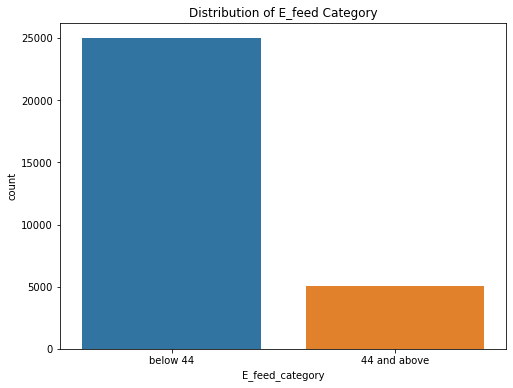

In [61]:
# Define a function that categorizes the E_feed values
def categorize_e_feed(val):
    if val >= 44:
        return "44 and above"
    else:
        return "below 44"

# Apply the function to the 'E_feed' column and create a new column
df['E_feed_category'] = df['E_feed'].apply(categorize_e_feed)

# Create a countplot
plt.figure(figsize=(8,6))
sns.countplot(x='E_feed_category', data=df)
plt.title('Distribution of E_feed Category')
plt.show()

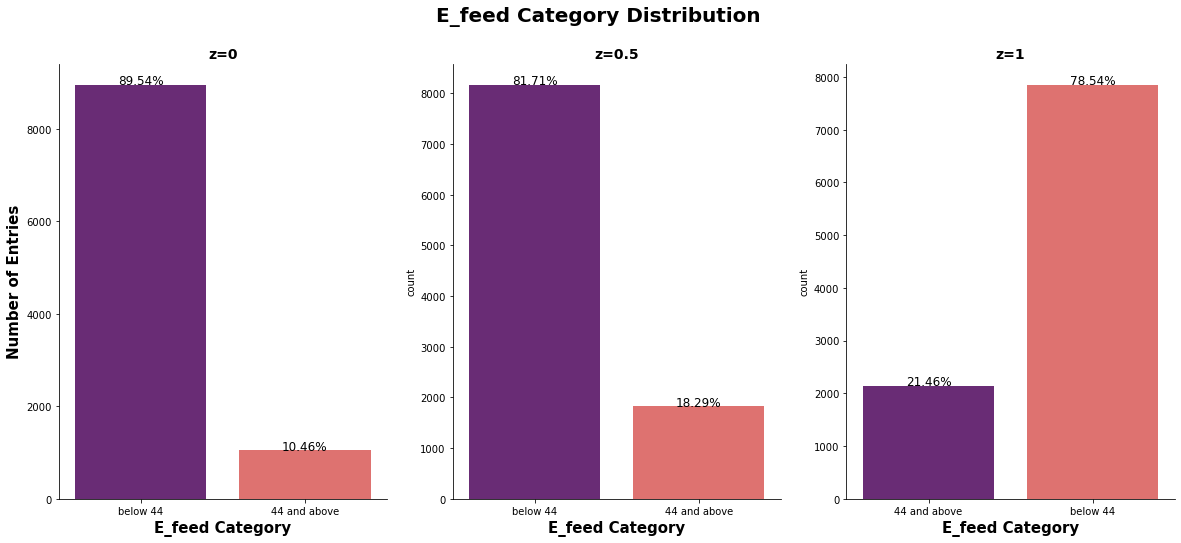

In [62]:
# Define the total count of rows for each z value for the percentage calculation
total_z0 = len(df[df['z']==0])
total_z1 = len(df[df['z']==0.5])
total_z2 = len(df[df['z']==1])

fig, ax = plt.subplots(1,3,figsize=(20,8))  # Create 3 subplots
sns.despine(top=True, right=True, left=False, bottom=False)

# Plot for z=0
ax1 = sns.countplot(x='E_feed_category', data=df[df['z']==0], palette="magma", ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z0*100),
            ha="center",fontsize=12) 

# Plot for z=0.5
ax2 = sns.countplot(x='E_feed_category', data=df[df['z']==0.5], palette="magma", ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z1*100),
            ha="center",fontsize=12) 

# Plot for z=1
ax3 = sns.countplot(x='E_feed_category', data=df[df['z']==1], palette="magma", ax=ax[2])
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z2*100),
            ha="center",fontsize=12) 

fig.suptitle("E_feed Category Distribution", fontsize=20, fontweight="bold")
ax[0].set_title('z=0', fontsize=14, fontweight="bold")
ax[1].set_title('z=0.5', fontsize=14, fontweight="bold")
ax[2].set_title('z=1', fontsize=14, fontweight="bold") 

ax[0].set_ylabel('Number of Entries', fontsize=15, fontweight="bold")
ax[0].set_xlabel('E_feed Category', fontsize=15, fontweight="bold")
ax[1].set_xlabel('E_feed Category', fontsize=15, fontweight="bold")
ax[2].set_xlabel('E_feed Category', fontsize=15, fontweight="bold")

plt.show()

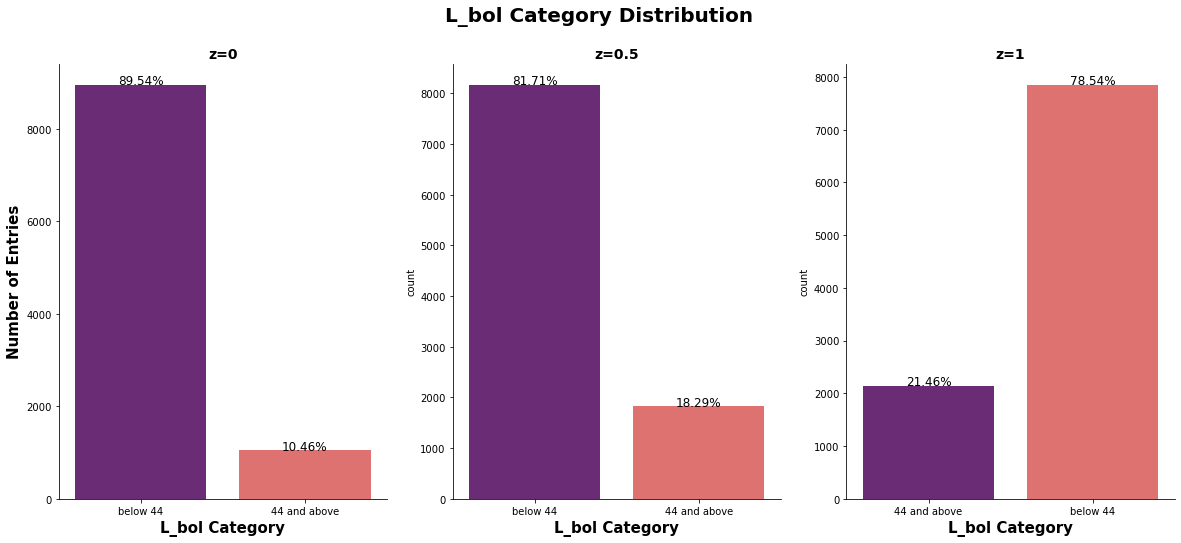

In [63]:
# Define a function that categorizes the E_feed values
def categorize_L_bol(val):
    if val >= 44:
        return "44 and above"
    else:
        return "below 44"

# Apply the function to the 'L_bol' column and create a new column
df['L_bol_category'] = df['L_bol'].apply(categorize_L_bol)

# Define the total count of rows for each z value for the percentage calculation
total_z0 = len(df[df['z']==0])
total_z1 = len(df[df['z']==0.5])
total_z2 = len(df[df['z']==1])

fig, ax = plt.subplots(1,3,figsize=(20,8))  # Create 3 subplots
sns.despine(top=True, right=True, left=False, bottom=False)

# Plot for z=0
ax1 = sns.countplot(x='L_bol_category', data=df[df['z']==0], palette="magma", ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z0*100),
            ha="center",fontsize=12) 

# Plot for z=0.5
ax2 = sns.countplot(x='L_bol_category', data=df[df['z']==0.5], palette="magma", ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z1*100),
            ha="center",fontsize=12) 

# Plot for z=1
ax3 = sns.countplot(x='L_bol_category', data=df[df['z']==1], palette="magma", ax=ax[2])
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z2*100),
            ha="center",fontsize=12) 

fig.suptitle("L_bol Category Distribution", fontsize=20, fontweight="bold")
ax[0].set_title('z=0', fontsize=14, fontweight="bold")
ax[1].set_title('z=0.5', fontsize=14, fontweight="bold")
ax[2].set_title('z=1', fontsize=14, fontweight="bold") 

ax[0].set_ylabel('Number of Entries', fontsize=15, fontweight="bold")
ax[0].set_xlabel('L_bol Category', fontsize=15, fontweight="bold")
ax[1].set_xlabel('L_bol Category', fontsize=15, fontweight="bold")
ax[2].set_xlabel('L_bol Category', fontsize=15, fontweight="bold")

plt.show()

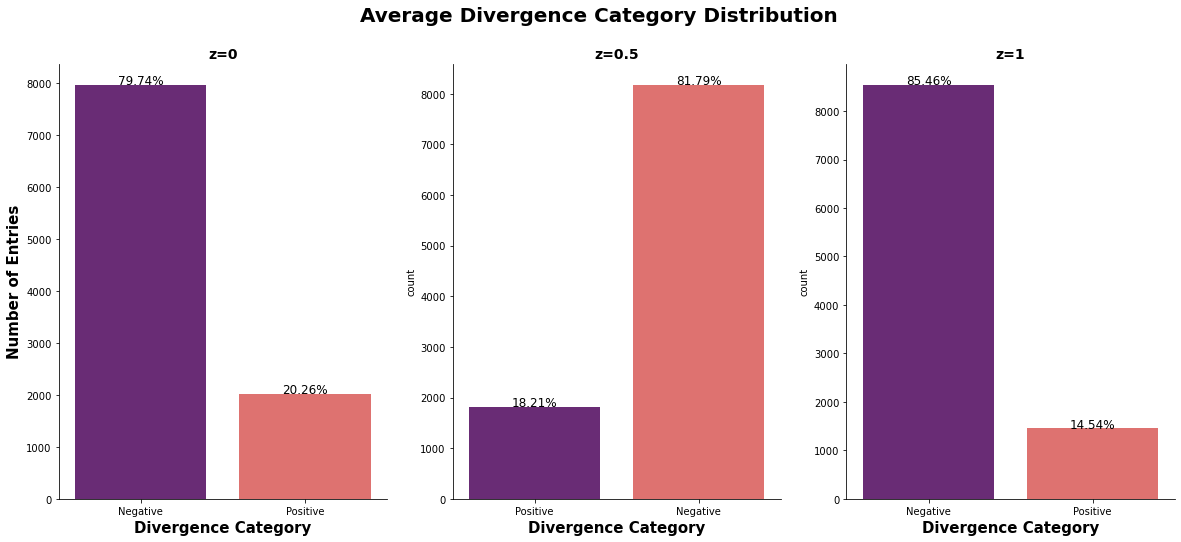

In [66]:
# Function to categorize 'Average divergence'
def categorize_divergence(value):
    if value < 0:
        return 'Negative'
    else:
        return 'Positive'


# Apply the function to the 'Average divergence' column
df['divergence_category'] = df['Average divergence'].apply(categorize_divergence)


# Apply the function to the 'Average divergence' column
df['divergence_category'] = df['Average divergence'].apply(categorize_divergence)


fig, ax = plt.subplots(1,3,figsize=(20,8))  # Create 3 subplots
sns.despine(top=True, right=True, left=False, bottom=False)

# Total counts for each z value
total_z0 = len(df[df['z']==0])
total_z05 = len(df[df['z']==0.5])
total_z1 = len(df[df['z']==1])

# Plot for z=0
ax1 = sns.countplot(x='divergence_category', data=df[df['z']==0], palette="magma", ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z0*100),
            ha="center",fontsize=12) 

# Plot for z=0.5
ax2 = sns.countplot(x='divergence_category', data=df[df['z']==0.5], palette="magma", ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z05*100),
            ha="center",fontsize=12) 

# Plot for z=1
ax3 = sns.countplot(x='divergence_category', data=df[df['z']==1], palette="magma", ax=ax[2])
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z1*100),
            ha="center",fontsize=12) 

fig.suptitle("Average Divergence Category Distribution", fontsize=20, fontweight="bold")
ax[0].set_title('z=0', fontsize=14, fontweight="bold")
ax[1].set_title('z=0.5', fontsize=14, fontweight="bold")
ax[2].set_title('z=1', fontsize=14, fontweight="bold") 

ax[0].set_ylabel('Number of Entries', fontsize=15, fontweight="bold")
ax[0].set_xlabel('Divergence Category', fontsize=15, fontweight="bold")
ax[1].set_xlabel('Divergence Category', fontsize=15, fontweight="bold")
ax[2].set_xlabel('Divergence Category', fontsize=15, fontweight="bold")

plt.show()

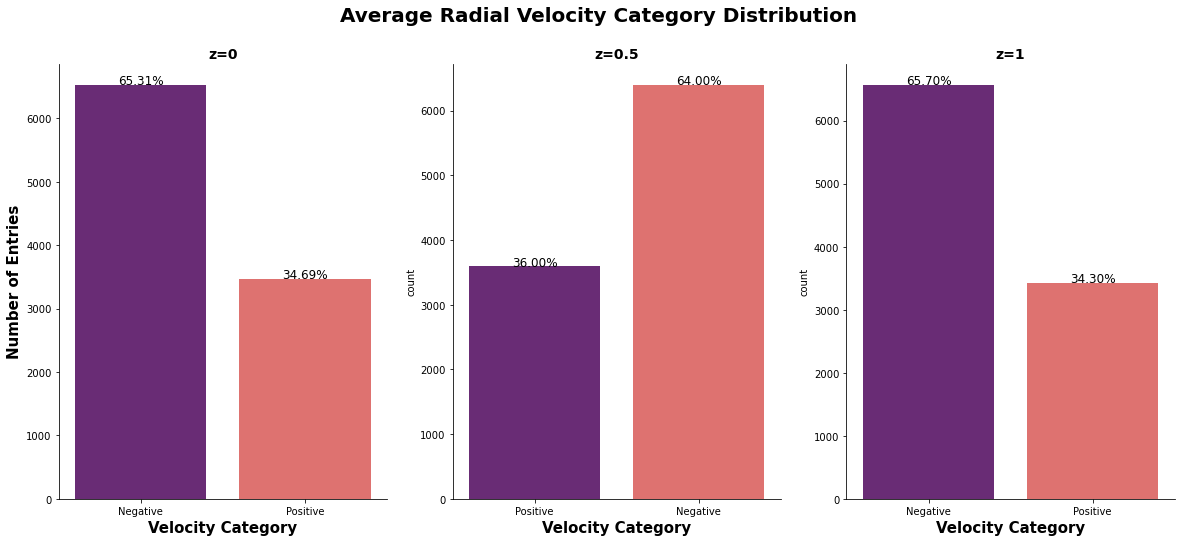

In [65]:
# Function to categorize 'Average divergence'
def categorize_velocity(value):
    if value < 0:
        return 'Negative'
    else:
        return 'Positive'


# Apply the function to the 'Average divergence' column
df['velocity_category'] = df['Average radial velocity'].apply(categorize_velocity)


# Apply the function to the 'Average divergence' column
df['velocity_category'] = df['Average radial velocity'].apply(categorize_velocity)


fig, ax = plt.subplots(1,3,figsize=(20,8))  # Create 3 subplots
sns.despine(top=True, right=True, left=False, bottom=False)

# Total counts for each z value
total_z0 = len(df[df['z']==0])
total_z05 = len(df[df['z']==0.5])
total_z1 = len(df[df['z']==1])

# Plot for z=0
ax1 = sns.countplot(x='velocity_category', data=df[df['z']==0], palette="magma", ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z0*100),
            ha="center",fontsize=12) 

# Plot for z=0.5
ax2 = sns.countplot(x='velocity_category', data=df[df['z']==0.5], palette="magma", ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z05*100),
            ha="center",fontsize=12) 

# Plot for z=1
ax3 = sns.countplot(x='velocity_category', data=df[df['z']==1], palette="magma", ax=ax[2])
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_z1*100),
            ha="center",fontsize=12) 

fig.suptitle("Average Radial Velocity Category Distribution", fontsize=20, fontweight="bold")
ax[0].set_title('z=0', fontsize=14, fontweight="bold")
ax[1].set_title('z=0.5', fontsize=14, fontweight="bold")
ax[2].set_title('z=1', fontsize=14, fontweight="bold") 

ax[0].set_ylabel('Number of Entries', fontsize=15, fontweight="bold")
ax[0].set_xlabel('Velocity Category', fontsize=15, fontweight="bold")
ax[1].set_xlabel('Velocity Category', fontsize=15, fontweight="bold")
ax[2].set_xlabel('Velocity Category', fontsize=15, fontweight="bold")

plt.show()

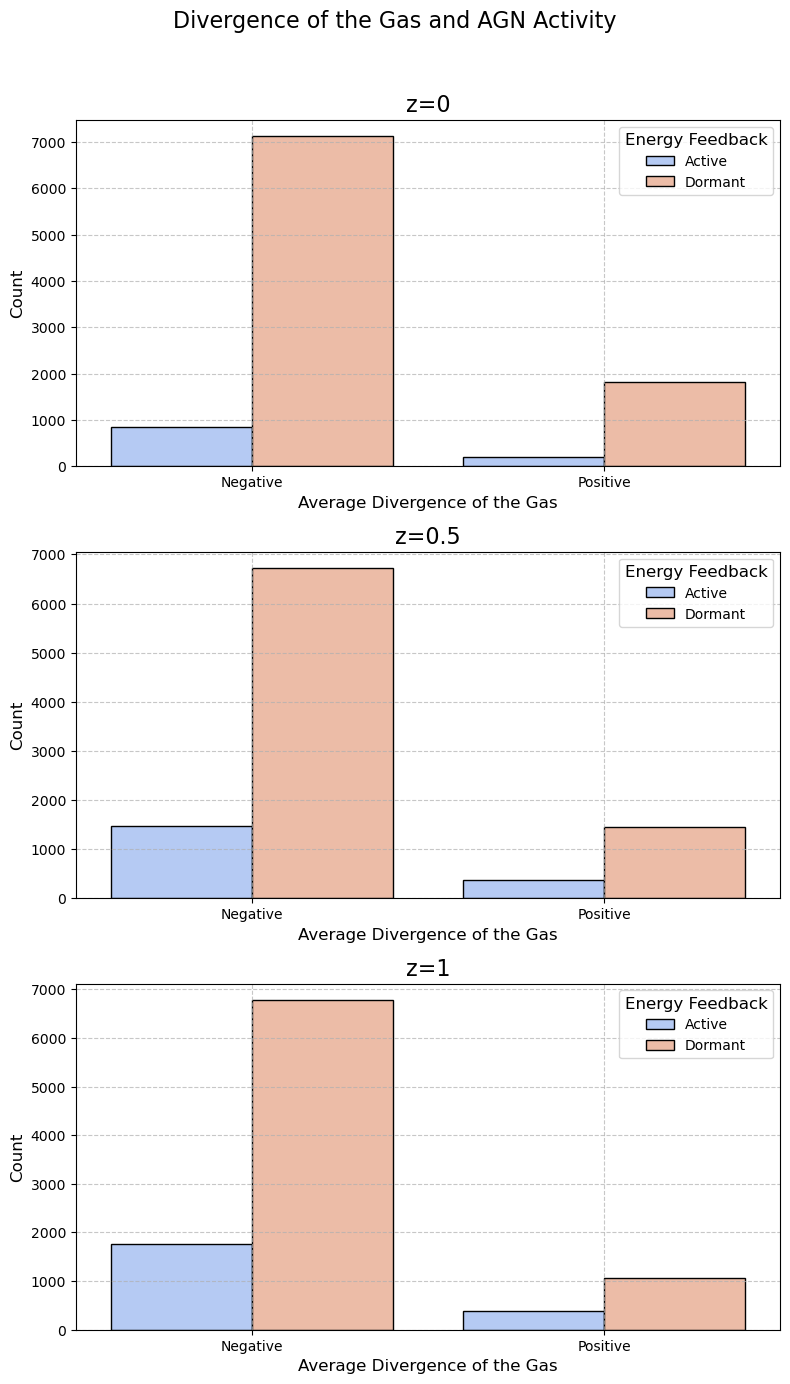

In [19]:
# Function to categorize 'Average divergence'
def categorize_divergence(value):
    if value < 0:
        return 'Negative'
    else:
        return 'Positive'


# Apply the function to the 'Average divergence' column
df['divergence_category'] = df['Average divergence'].apply(categorize_divergence)

# Create a new column for E_feed category
df['Energy Feedback'] = df['E_feed'].apply(lambda x: 'Active' if x>=44 else 'Dormant')

# Create the subplots
fig, ax = plt.subplots(3, figsize=(8, 15.5))

# Set the overall title with increased font size
fig.suptitle("Divergence of the Gas and AGN Activity", fontsize=16, x=0.5, y=0.92)

# Define the hue order to keep it consistent across all subplots
hue_order = ['Active', 'Dormant']

# Common settings to make the plots nicer
common_plot_settings = {
    'palette': "coolwarm",  # Changed color palette to 'coolwarm'
    'hue_order': hue_order,
    'edgecolor': 'black'  # Add edge color to bars for better distinction
}

# Plot for z=0 with consistent hue_order and improved aesthetics
sns.countplot(x='divergence_category', hue='Energy Feedback', data=df[df['z']==0], ax=ax[0], **common_plot_settings)
ax[0].set_title('z=0', fontsize=16)
ax[0].set_xlabel('Average Divergence of the Gas', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Plot for z=0.5 with consistent hue_order and improved aesthetics
sns.countplot(x='divergence_category', hue='Energy Feedback', data=df[df['z']==0.5], ax=ax[1], **common_plot_settings)
ax[1].set_title('z=0.5', fontsize=16)
ax[1].set_xlabel('Average Divergence of the Gas', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)

# Plot for z=1 with consistent hue_order and improved aesthetics
sns.countplot(x='divergence_category', hue='Energy Feedback', data=df[df['z']==1], ax=ax[2], **common_plot_settings)
ax[2].set_title('z=1', fontsize=16)
ax[2].set_xlabel('Average Divergence of the Gas', fontsize=12)
ax[2].set_ylabel('Count', fontsize=12)
ax[2].grid(True, linestyle='--', alpha=0.7)

# Move the legend to an unobtrusive location and adjust its font size
for axis in ax:
    axis.legend(title='Energy Feedback', title_fontsize='12', fontsize='10', loc='upper right')

# Save the figure with improved aesthetics
plt.savefig('Divergence of Gas and AGN Activity.png')
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

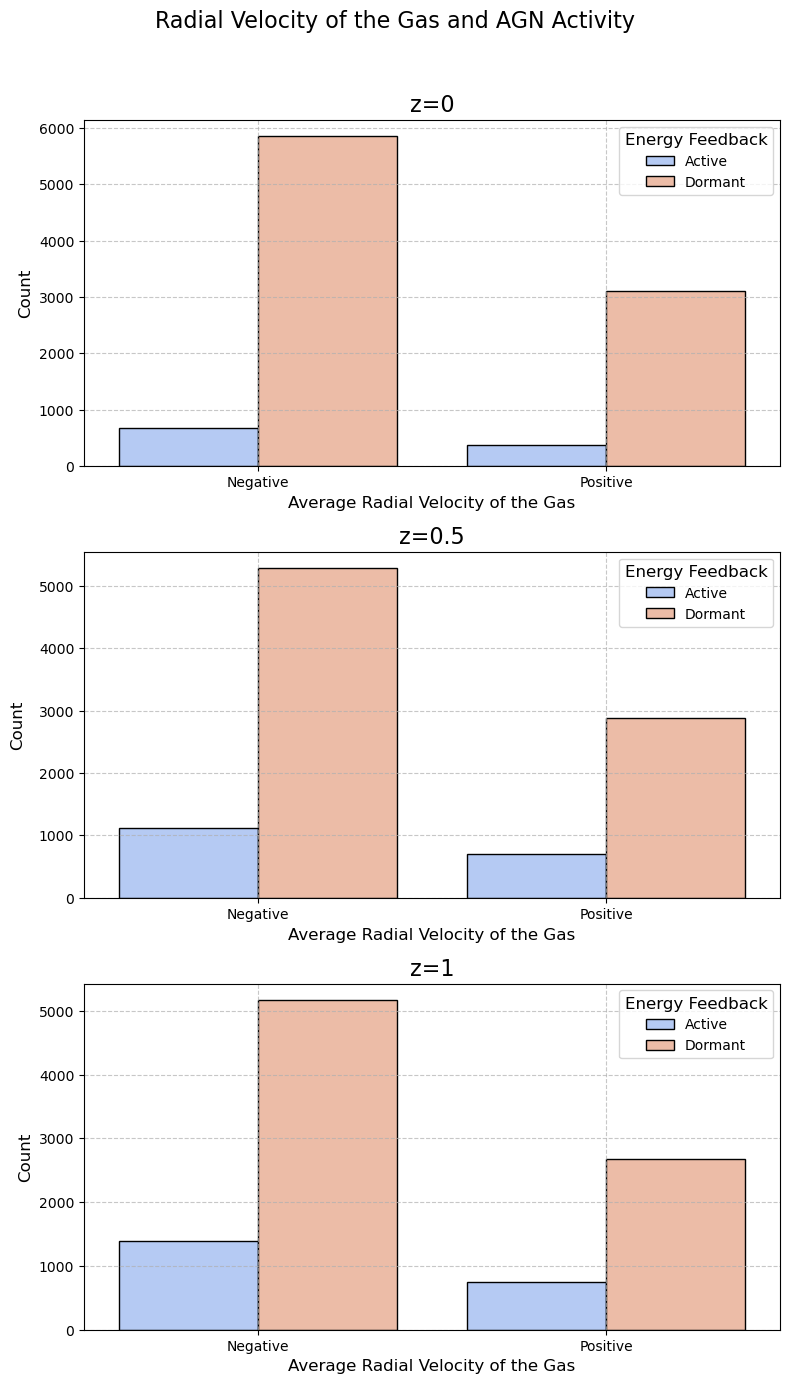

In [26]:
# Function to categorize 'Average velocity'
def categorize_velocity(value):
    if value < 0:
        return 'Negative'
    else:
        return 'Positive'

# Apply the function to the 'Average radial velocity' column
df['velocity_category'] = df['Average radial velocity'].apply(categorize_velocity)

# Create a new column for E_feed category
df['Energy Feedback'] = df['E_feed'].apply(lambda x: 'Active' if x >= 44 else 'Dormant')

# Create the subplots with the specified figsize of (8, 15.5)
fig, ax = plt.subplots(3, figsize=(8, 15.5))

# Set the overall title with increased font size
fig.suptitle("Radial Velocity of the Gas and AGN Activity", fontsize=16, x=0.5, y=0.92)

# Define the hue and x-axis order to keep them consistent across all subplots
hue_order = ['Active', 'Dormant']
x_order = ['Negative', 'Positive']  # Added x_order for velocity categories

# Common settings to make the plots nicer
common_plot_settings = {
    'palette': "coolwarm",  # Changed color palette to 'coolwarm'
    'hue_order': hue_order,
    'order': x_order,  # Added order for velocity categories
    'edgecolor': 'black'  # Add edge color to bars for better distinction
}

# Plot for z=0 with consistent hue_order and improved aesthetics
sns.countplot(x='velocity_category', hue='Energy Feedback', data=df[df['z'] == 0], ax=ax[0], **common_plot_settings)
ax[0].set_title('z=0', fontsize=16)
ax[0].set_xlabel('Average Radial Velocity of the Gas', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].legend(title='Energy Feedback', title_fontsize='12', fontsize='10', loc='upper right')

# Plot for z=0.5 with consistent hue_order and improved aesthetics
sns.countplot(x='velocity_category', hue='Energy Feedback', data=df[df['z'] == 0.5], ax=ax[1], **common_plot_settings)
ax[1].set_title('z=0.5', fontsize=16)
ax[1].set_xlabel('Average Radial Velocity of the Gas', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12, labelpad=10)  # Added label padding to avoid overlap
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].legend(title='Energy Feedback', title_fontsize='12', fontsize='10', loc='upper right') 

# Plot for z=1 with consistent hue_order and improved aesthetics
sns.countplot(x='velocity_category', hue='Energy Feedback', data=df[df['z'] == 1], ax=ax[2], **common_plot_settings)
ax[2].set_title('z=1', fontsize=16)
ax[2].set_xlabel('Average Radial Velocity of the Gas', fontsize=12)
ax[2].set_ylabel('Count', fontsize=12)
ax[2].grid(True, linestyle='--', alpha=0.7)
ax[2].legend(title='Energy Feedback', title_fontsize='12', fontsize='10', loc='upper right')

# Save the figure
plt.savefig('Radial Velocity of Gas and AGN Activity.png')
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

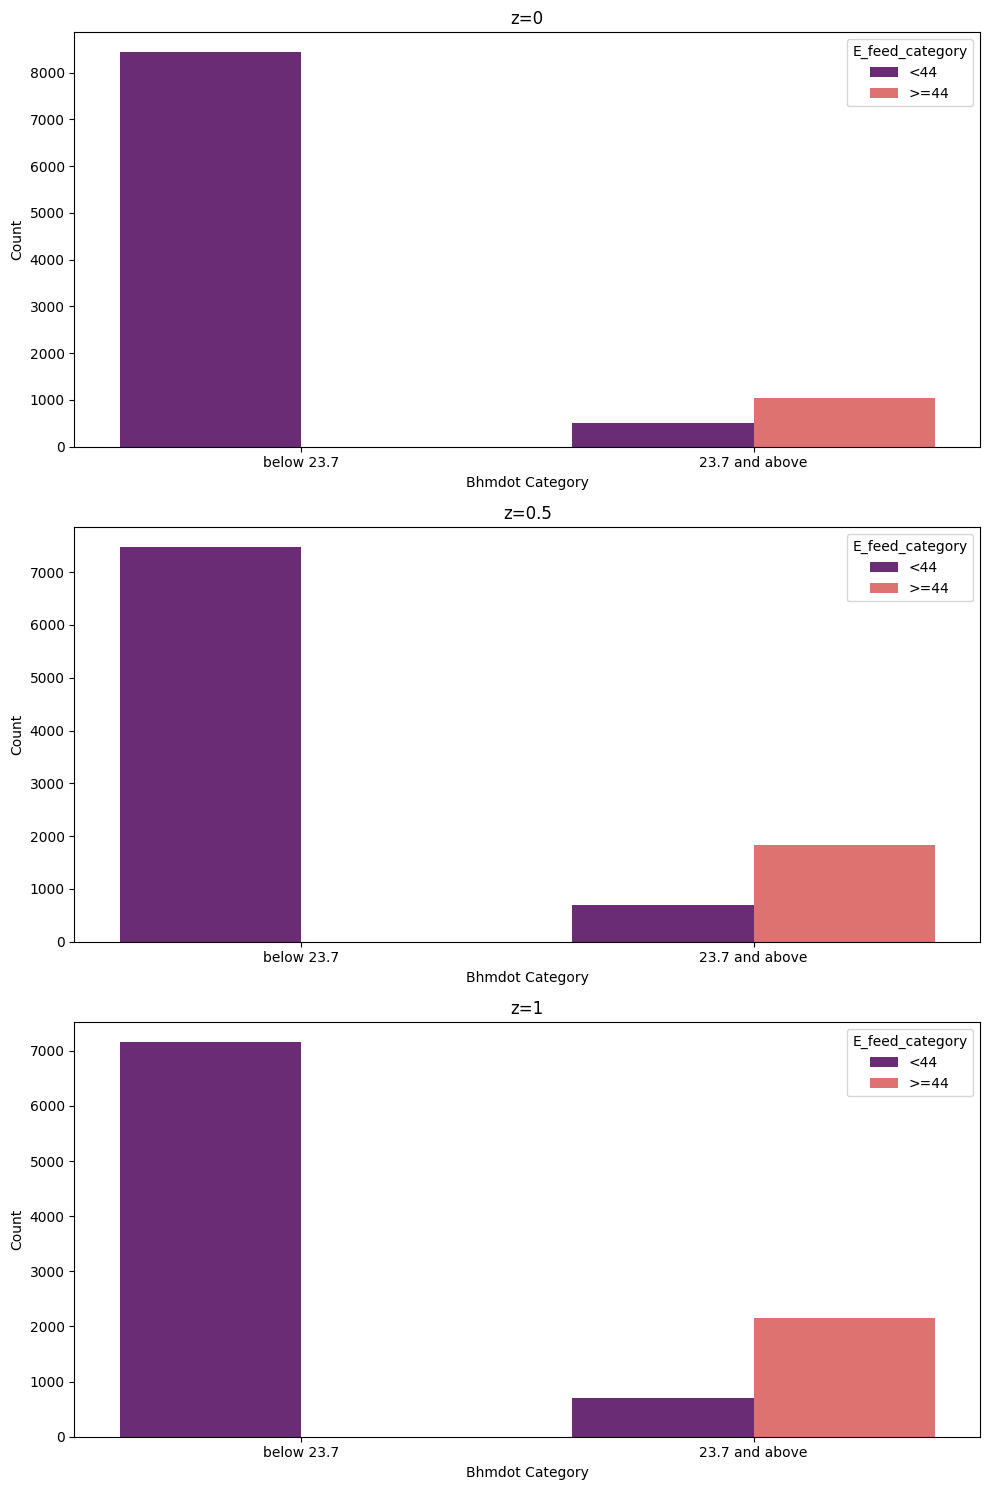

In [44]:
def categorize_bhmdot(value):
    if value >= 23.6:
        return "23.7 and above"
    else:
        return "below 23.7"


# Apply the categorize_bhmdot function to the 'Bhmdot' column
df['bhmdot_category'] = df['Bhmdot'].apply(categorize_bhmdot)

# Create a new column for E_feed category
df['E_feed_category'] = df['E_feed'].apply(lambda x: '>=44' if x>=44 else '<44')

fig, ax = plt.subplots(3, figsize = (10,15))

# Plot for z=0
sns.countplot(x='bhmdot_category', hue='E_feed_category', data=df[df['z']==0], palette="magma", ax=ax[0])
ax[0].set_title('z=0')
ax[0].set_xlabel('Bhmdot Category')
ax[0].set_ylabel('Count')

# Plot for z=0.5
sns.countplot(x='bhmdot_category', hue='E_feed_category', data=df[df['z']==0.5], palette="magma", ax=ax[1])
ax[1].set_title('z=0.5')
ax[1].set_xlabel('Bhmdot Category')
ax[1].set_ylabel('Count')

# Plot for z=1
sns.countplot(x='bhmdot_category', hue='E_feed_category', data=df[df['z']==1], palette="magma", ax=ax[2])
ax[2].set_title('z=1')
ax[2].set_xlabel('Bhmdot Category')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

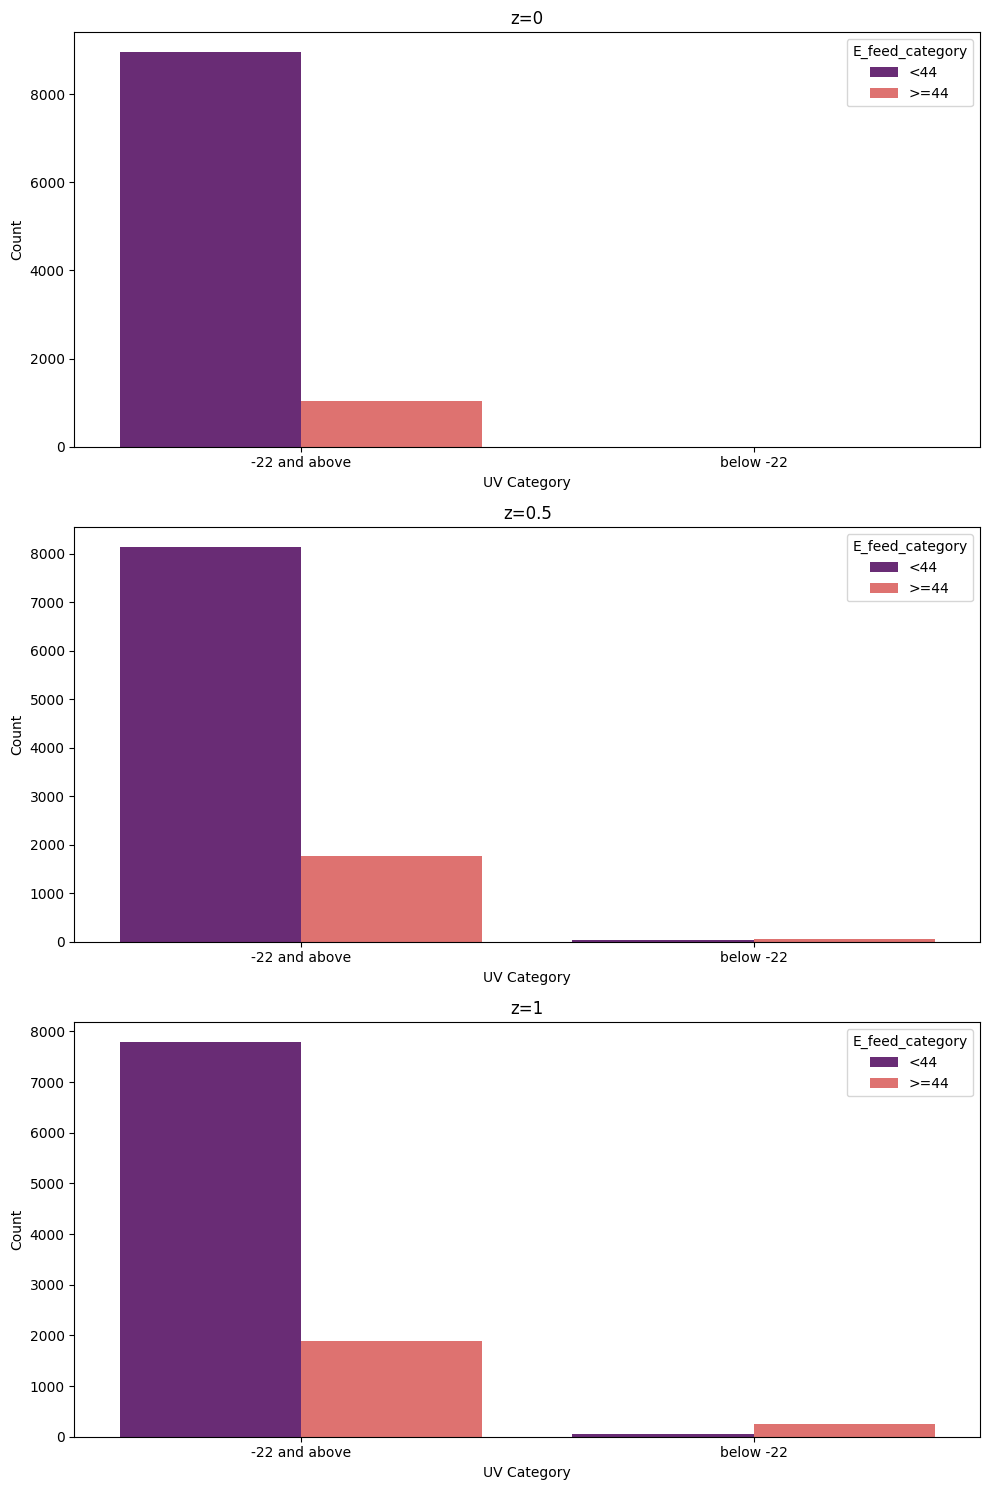

In [41]:
def categorize_uv(value):
    if value >= -22:
        return "-22 and above"
    else:
        return "below -22"


# Apply the categorize_bhmdot function to the 'Bhmdot' column
df['UV_Band_category'] = df['UV_Band'].apply(categorize_uv)

# Create a new column for E_feed category
df['E_feed_category'] = df['E_feed'].apply(lambda x: '>=44' if x>=44 else '<44')

fig, ax = plt.subplots(3, figsize = (10,15))

# Plot for z=0
sns.countplot(x='UV_Band_category', hue='E_feed_category', data=df[df['z']==0], palette="magma", ax=ax[0])
ax[0].set_title('z=0')
ax[0].set_xlabel('UV Category')
ax[0].set_ylabel('Count')

# Plot for z=0.5
sns.countplot(x='UV_Band_category', hue='E_feed_category', data=df[df['z']==0.5], palette="magma", ax=ax[1])
ax[1].set_title('z=0.5')
ax[1].set_xlabel('UV Category')
ax[1].set_ylabel('Count')

# Plot for z=1
sns.countplot(x='UV_Band_category', hue='E_feed_category', data=df[df['z']==1], palette="magma", ax=ax[2])
ax[2].set_title('z=1')
ax[2].set_xlabel('UV Category')
ax[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

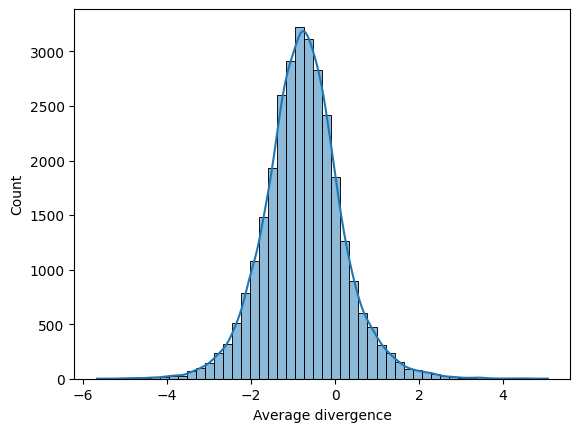

In [42]:
# Distribution of 'Average Divergence'
sns.histplot(df['Average divergence'], bins=50, kde=True)
plt.show()

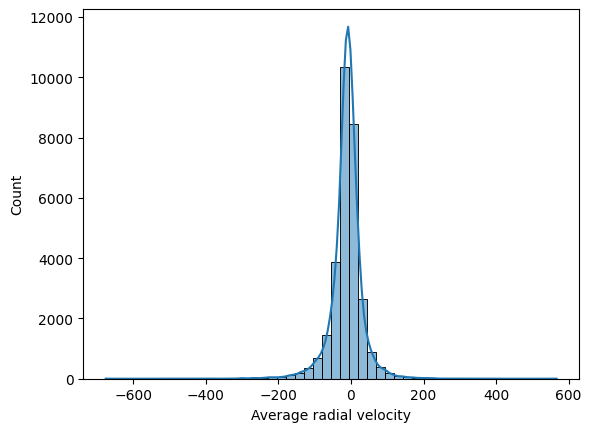

In [48]:
# Distribution of 'Average Divergence'
sns.histplot(df['Average radial velocity'], bins=50, kde=True)
plt.show()

#### Parameters to construct a model

We know that for Energy feedback the value has to be log 44 in order for the AGN to be considered active and from the above analysis and the analysis that coducted in the 6 galaxies (Visualisation notebook) I have came to conclusion that:

BH mdot has to be equal or greater than log 23.7
Bolometric Luminosity equal or greater than log 44, however as we saw aboive the L_bol values mathc the Energy feedback
Average Divergence has to be negative for the AGN to continuous be active

Futhermore, I will exclude from the model the following:

SFRinhalfrad  (I didnt find any correlation of SFR and when the AGN was active and when was not) Probably limitations to it was that I am not sure if the SFR was near the BH (I know that is near the halo) 

Blackhole Masses (Was always in a steady rise of mass and I found correlation to BH_CumEgyInjection_QM from the PartType5, though I didnt find correlation to AGN when was active and when was not)

MSFR similar too SFRinhalfrad

UV_Band (or I didnt understood well or the variation in UV brightness could be attributed to different stages of AGN activity, AGN obscured by dust, differences in AGN accretion rates, and so on.) range of UV was between -19mag to 23mag

In [7]:
# Load the data
df = pd.read_csv("Z.csv")

# Check the first few rows of the data
df.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity,z
0,400542,43.781577,43.781577,0.768577,-0.718431,23.526906,6.963064,0.011441,-20.029860,0.036281,-20.353913,1.0
1,571430,42.683827,42.683827,0.061235,-0.057450,22.429156,6.331825,0.005596,-17.758312,0.012393,4.933006,0.5
2,501339,43.889919,43.889919,0.403847,-0.300244,23.635248,7.276626,0.012293,-19.918102,0.022619,-47.569055,0.5
3,459830,42.966389,42.966389,0.594868,0.684833,22.711717,6.223946,0.008581,-19.374203,0.030455,22.870611,1.0
4,432336,43.672927,43.672927,0.782470,-2.299366,23.418256,6.468445,0.011858,-20.435884,0.088274,-20.780845,1.0


In [8]:
df = df.drop(['ID','UV_Band', 'MSFR', 'SFRinhalfrad', 'Blackhole Masses', 'z', 'L_bol', 'λ'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   E_feed                   30000 non-null  float64
 1   Average divergence       30000 non-null  float64
 2   Bhmdot                   30000 non-null  float64
 3   Average radial velocity  30000 non-null  float64
dtypes: float64(4)
memory usage: 937.6 KB


#### Model 1

In [10]:
# Define criteria for active AGN
criteria = (df['E_feed'] >= 44)

# Create a new column 'is_active' based on the criteria
df['is_active'] = np.where(criteria, 1, 0)

# Display the number of active and dormant AGNs in the dataset
active_counts = df['is_active'].value_counts()

active_counts

is_active
0    24979
1     5021
Name: count, dtype: int64

In [11]:
# Drop the columns to be excluded and the ID column
features = df.drop(columns=['is_active', 'E_feed', 'Bhmdot'])
target = df['is_active']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((24000, 2), (6000, 2))

In [12]:
# Initialize and train the logistic regression model
lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)

0.8315


In [14]:
print(class_report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4989
           1       0.00      0.00      0.00      1011

    accuracy                           0.83      6000
   macro avg       0.42      0.50      0.45      6000
weighted avg       0.69      0.83      0.76      6000



In [15]:
# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Get feature importances from the model
feature_importances = rf.feature_importances_

print(accuracy_rf)

0.8161666666666667


In [16]:
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4989
           1       0.30      0.07      0.11      1011

    accuracy                           0.82      6000
   macro avg       0.57      0.52      0.50      6000
weighted avg       0.75      0.82      0.76      6000



In [17]:
print(feature_importances)

[0.50628722 0.49371278]


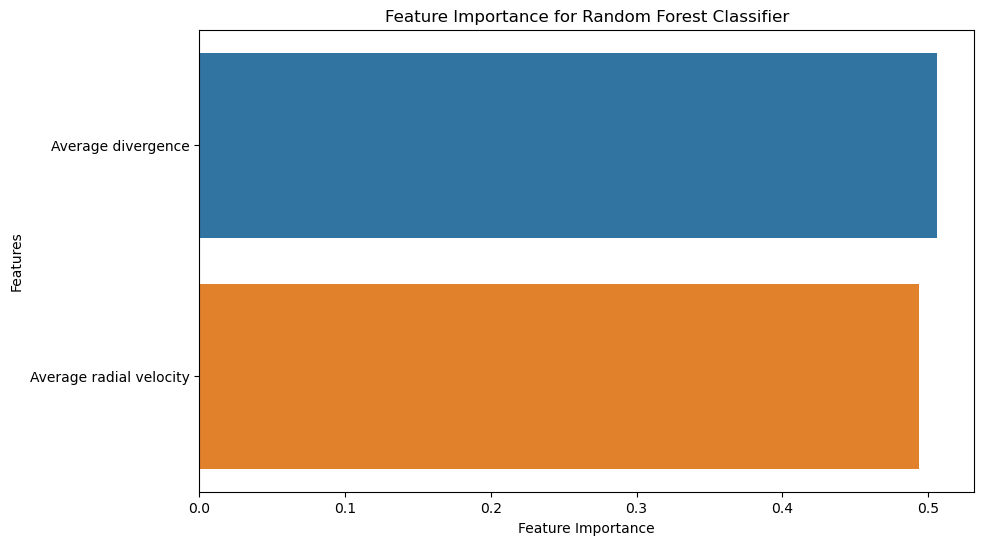

In [18]:
# Extract feature importance from the Random Forest model
feature_importances = rf.feature_importances_

# Pair feature names with their importance scores
features_list = X_train.columns.tolist()
feature_importance_pairs = list(zip(features_list, feature_importances))

# Sort the feature importances in descending order
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[1] for item in sorted_feature_importance], y=[item[0] for item in sorted_feature_importance])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

In [19]:
# Compute confusion matrices for both models
confusion_lr = confusion_matrix(y_test, y_pred)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

confusion_lr, confusion_rf

(array([[4989,    0],
        [1011,    0]]),
 array([[4828,  161],
        [ 942,   69]]))

In [20]:
# Total AGNs in the entire dataset
total_active = df['is_active'].sum()
total_dormant = len(df) - total_active

# AGNs in the test set based on true labels
test_active_true = y_test.sum()
test_dormant_true = len(y_test) - test_active_true

# AGNs in the test set based on Logistic Regression predictions
test_active_lr = y_pred.sum()
test_dormant_lr = len(y_pred) - test_active_lr

# AGNs in the test set based on Random Forest predictions
test_active_rf = y_pred_rf.sum()
test_dormant_rf = len(y_pred_rf) - test_active_rf

total_summary = {
    "Total Dataset": {"Active": total_active, "Dormant": total_dormant},
    "Test Set (True)": {"Active": test_active_true, "Dormant": test_dormant_true},
    "Test Set (Logistic Regression)": {"Active": test_active_lr, "Dormant": test_dormant_lr},
    "Test Set (Random Forest)": {"Active": test_active_rf, "Dormant": test_dormant_rf}
}

total_summary

{'Total Dataset': {'Active': 5021, 'Dormant': 24979},
 'Test Set (True)': {'Active': 1011, 'Dormant': 4989},
 'Test Set (Logistic Regression)': {'Active': 0, 'Dormant': 6000},
 'Test Set (Random Forest)': {'Active': 230, 'Dormant': 5770}}

In [21]:
# Predict on the training set using the Random Forest model
y_pred_train_rf = rf.predict(X_train)

# Evaluate the model's performance on the training data
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)

accuracy_train_rf, accuracy_rf

(0.999875, 0.8161666666666667)

In [22]:
# Perform 5-fold cross-validation on the Random Forest model
cross_val_accuracies = cross_val_score(rf, features, target, cv=5, scoring="accuracy")

# Compute the mean and standard deviation of the cross-validation accuracies
mean_cross_val_accuracy = cross_val_accuracies.mean()
std_cross_val_accuracy = cross_val_accuracies.std()

cross_val_accuracies, mean_cross_val_accuracy, std_cross_val_accuracy

(array([0.81383333, 0.81083333, 0.8125    , 0.81266667, 0.812     ]),
 0.8123666666666667,
 0.0009741092797468266)

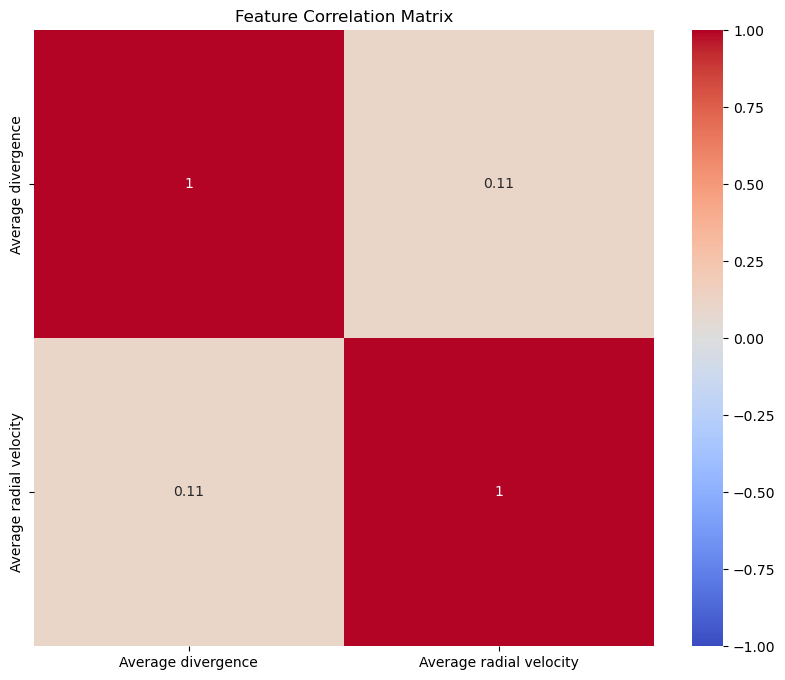

In [23]:
# Compute the correlation matrix
correlation_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

In [24]:
# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(accuracy_xgb)

0.8278333333333333


In [25]:
print(class_report_xgb)

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      4989
           1       0.36      0.03      0.05      1011

    accuracy                           0.83      6000
   macro avg       0.60      0.51      0.48      6000
weighted avg       0.75      0.83      0.76      6000



In [26]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% of the data might be anomalous

# Fit the model to the data
anomaly_scores = iso_forest.fit_predict(features)

# Count the number of normal and anomalous data points
normal_count = (anomaly_scores == 1).sum()
anomaly_count = (anomaly_scores == -1).sum()

normal_count, anomaly_count

(28500, 1500)

In [29]:
# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA and transform the data to the first two principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Convert to DataFrame for easier plotting
pc_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pc_df["is_active"] = df["is_active"]

# Percentage of variance explained by each of the selected components
explained_variance = pca.explained_variance_ratio_

pc_df, explained_variance

(            PC1       PC2  is_active
 0      0.112661  0.163882          0
 1     -0.793143  0.265718          0
 2      0.226543  0.915274          0
 3     -1.644087  0.546357          0
 4      1.324486 -1.034369          0
 ...         ...       ...        ...
 29995 -0.428334  1.024200          0
 29996 -0.444332  0.383460          0
 29997  0.430384 -0.401804          0
 29998  6.012508  6.386138          0
 29999  0.975430 -0.026478          0
 
 [30000 rows x 3 columns],
 array([0.55378338, 0.44621662]))

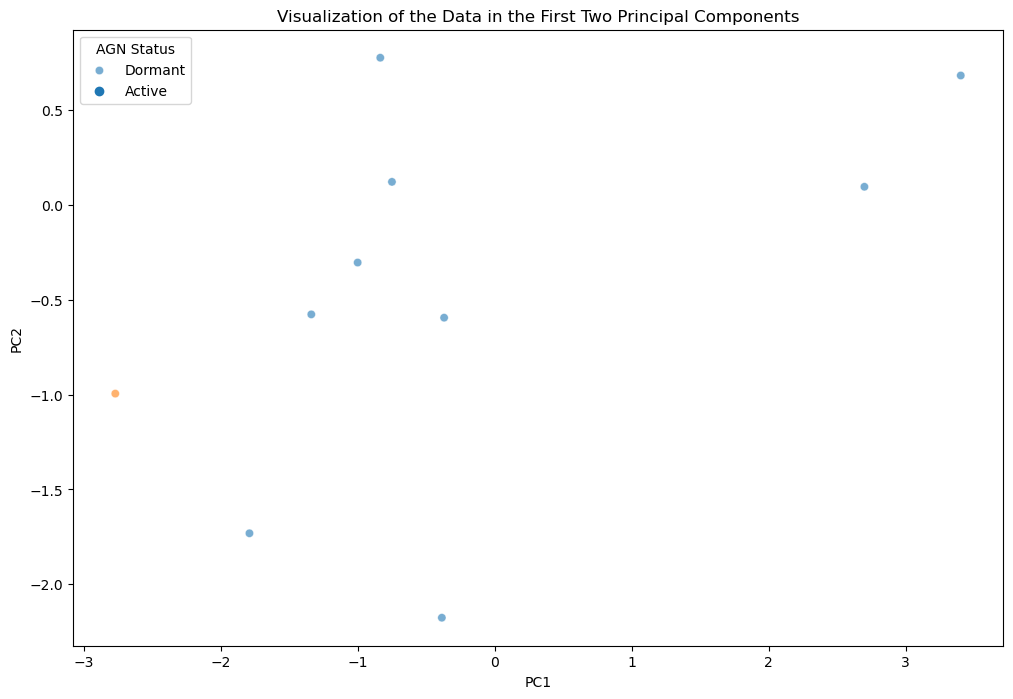

In [30]:
# Extracting the provided data for visualization
pc_sample_df = pd.DataFrame({
    "PC1": [-0.371505, -0.752477, -1.792948, -0.388105, -1.002851] + [-2.772506, 3.400900, 2.697396, -1.341311, -0.837541],
    "PC2": [-0.594873, 0.120896, -1.731015, -2.176030, -0.304312] + [-0.994994, 0.681447, 0.095044, -0.577417, 0.775121],
    "is_active": [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
})

# Visualizing the first two principal components
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pc_sample_df, x="PC1", y="PC2", hue="is_active", palette="tab10", alpha=0.6)
plt.title("Visualization of the Data in the First Two Principal Components")
plt.legend(title="AGN Status", labels=["Dormant", "Active"])
plt.show()

In [31]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)
lr_preds = lr.predict(X_test)

# Train a Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)
brf_preds = brf.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, lr_preds))
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("\nBalanced Random Forest:")
print(classification_report(y_test, brf_preds))
print("Accuracy:", accuracy_score(y_test, brf_preds))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.54      0.66      4008
           1       0.19      0.55      0.28       792

    accuracy                           0.54      4800
   macro avg       0.53      0.55      0.47      4800
weighted avg       0.75      0.54      0.60      4800

Accuracy: 0.5410416666666666

Balanced Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      4008
           1       0.19      0.53      0.28       792

    accuracy                           0.55      4800
   macro avg       0.53      0.55      0.48      4800
weighted avg       0.75      0.55      0.61      4800

Accuracy: 0.554375


#### Model 2

In [32]:
# Load the dataset
data = pd.read_csv("Z.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity,z
0,400542,43.781577,43.781577,0.768577,-0.718431,23.526906,6.963064,0.011441,-20.029860,0.036281,-20.353913,1.0
1,571430,42.683827,42.683827,0.061235,-0.057450,22.429156,6.331825,0.005596,-17.758312,0.012393,4.933006,0.5
2,501339,43.889919,43.889919,0.403847,-0.300244,23.635248,7.276626,0.012293,-19.918102,0.022619,-47.569055,0.5
3,459830,42.966389,42.966389,0.594868,0.684833,22.711717,6.223946,0.008581,-19.374203,0.030455,22.870611,1.0
4,432336,43.672927,43.672927,0.782470,-2.299366,23.418256,6.468445,0.011858,-20.435884,0.088274,-20.780845,1.0


In [33]:
# Check for missing values and data types
data_info = data.info()

# Check the statistical summary of the dataset
data_description = data.describe()

data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       30000 non-null  int64  
 1   E_feed                   30000 non-null  float64
 2   L_bol                    30000 non-null  float64
 3   SFRinhalfrad             30000 non-null  float64
 4   Average divergence       30000 non-null  float64
 5   Bhmdot                   30000 non-null  float64
 6   Blackhole Masses         30000 non-null  float64
 7   MSFR                     30000 non-null  float64
 8   UV_Band                  30000 non-null  float64
 9   λ                        30000 non-null  float64
 10  Average radial velocity  30000 non-null  float64
 11  z                        30000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.7 MB


(None,
                   ID        E_feed         L_bol  SFRinhalfrad  \
 count   30000.000000  30000.000000  30000.000000  30000.000000   
 mean   519509.213567     43.154274     43.154274      0.546816   
 std     83192.798958      0.947154      0.947154      1.133910   
 min    199097.000000     33.432589     33.432589      0.000000   
 25%    464119.000000     42.628717     42.628717      0.118014   
 50%    516372.500000     43.287584     43.287584      0.254195   
 75%    580895.250000     43.814000     43.814000      0.572476   
 max    659651.000000     46.274026     46.274026     80.750008   
 
        Average divergence        Bhmdot  Blackhole Masses          MSFR  \
 count        30000.000000  30000.000000      30000.000000  30000.000000   
 mean            -0.752030     22.899602          6.904714      0.012623   
 std              0.927696      0.947154          0.606003      0.006364   
 min             -5.666960     13.177917          6.072245      0.000000   
 25%    

In [34]:
data = data.drop(['ID', 'L_bol', 'SFRinhalfrad', 'Blackhole Masses', 'MSFR', 'Bhmdot', 'UV_Band', 'λ', 'z'], axis=1)

In [35]:
data

,E_feed,Average divergence,Average radial velocity
0,43.781577,-0.718431,-20.353913
1,42.683827,-0.057450,4.933006
2,43.889919,-0.300244,-47.569055
3,42.966389,0.684833,22.870611
4,43.672927,-2.299366,-20.780845
...,...,...,...
29995,43.830792,0.200788,-30.397470
29996,40.164628,-0.209024,-9.741299
29997,42.848859,-1.297920,-12.554805
29998,42.600491,-0.506941,-401.626188


In [36]:
#create E_feed grouping

def Feedback(num_E):
    if num_E >= 44:
        return "1"
    elif num_E < 44:
        return "0"
    
# Gas_Flow_Direction

def Gas_Flow_Direction(num_D):
    if num_D < 0:
        return "1"
    elif num_D >= 0 :
        return "0"

In [37]:
#apply function   
data['E_feed']= data['E_feed'].apply(Feedback)

#apply function   
data['Average divergence']= data['Average divergence'].apply(Gas_Flow_Direction)

#apply function   
data['Average radial velocity']= data['Average radial velocity'].apply(Gas_Flow_Direction)

In [38]:
#E_feed
data['E_feed'].value_counts()

E_feed
0    24979
1     5021
Name: count, dtype: int64

In [39]:
#Average divergence
data['Average divergence'].value_counts()

Average divergence
1    24699
0     5301
Name: count, dtype: int64

In [40]:
#Average divergence
data['Average radial velocity'].value_counts()

Average radial velocity
1    19501
0    10499
Name: count, dtype: int64

In [41]:
# Split the dataset into features (X) and target (y) sets
X1 = data.drop(columns='E_feed')
y1 = data['E_feed']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

X_train1.shape, X_test1.shape

((24000, 2), (6000, 2))

In [42]:
# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train1, y_train1)

# Predict on the testing set
y_pred1 = model.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)

accuracy

0.8315

In [43]:
# Generate the classification report
report = classification_report(y_test1, y_pred1)

report

'              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      4989\n           1       0.00      0.00      0.00      1011\n\n    accuracy                           0.83      6000\n   macro avg       0.42      0.50      0.45      6000\nweighted avg       0.69      0.83      0.76      6000\n'

In [44]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train1, y_train1)

# Predict on the testing set
rf_y_pred = rf_model.predict(X_test1)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test1, rf_y_pred)

# Generate the classification report for Random Forest
rf_report = classification_report(y_test1, rf_y_pred)

rf_accuracy, rf_report

(0.8315,
 '              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91      4989\n           1       0.00      0.00      0.00      1011\n\n    accuracy                           0.83      6000\n   macro avg       0.42      0.50      0.45      6000\nweighted avg       0.69      0.83      0.76      6000\n')

----------------------------------------------------------

In [46]:
# Load the dataset
data = pd.read_csv("Z.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

,ID,E_feed,L_bol,SFRinhalfrad,Average divergence,Bhmdot,Blackhole Masses,MSFR,UV_Band,λ,Average radial velocity,z
0,400542,43.781577,43.781577,0.768577,-0.718431,23.526906,6.963064,0.011441,-20.029860,0.036281,-20.353913,1.0
1,571430,42.683827,42.683827,0.061235,-0.057450,22.429156,6.331825,0.005596,-17.758312,0.012393,4.933006,0.5
2,501339,43.889919,43.889919,0.403847,-0.300244,23.635248,7.276626,0.012293,-19.918102,0.022619,-47.569055,0.5
3,459830,42.966389,42.966389,0.594868,0.684833,22.711717,6.223946,0.008581,-19.374203,0.030455,22.870611,1.0
4,432336,43.672927,43.672927,0.782470,-2.299366,23.418256,6.468445,0.011858,-20.435884,0.088274,-20.780845,1.0


In [47]:
data = data.drop(['ID', 'L_bol', 'SFRinhalfrad', 'Blackhole Masses', 'MSFR', 'UV_Band', 'z', 'λ'], axis=1)

In [48]:
data

,E_feed,Average divergence,Bhmdot,Average radial velocity
0,43.781577,-0.718431,23.526906,-20.353913
1,42.683827,-0.057450,22.429156,4.933006
2,43.889919,-0.300244,23.635248,-47.569055
3,42.966389,0.684833,22.711717,22.870611
4,43.672927,-2.299366,23.418256,-20.780845
...,...,...,...,...
29995,43.830792,0.200788,23.576120,-30.397470
29996,40.164628,-0.209024,19.909957,-9.741299
29997,42.848859,-1.297920,22.594187,-12.554805
29998,42.600491,-0.506941,22.345820,-401.626188


In [49]:
#create E_feed grouping

def Feedback(num_E):
    if num_E >= 44:
        return "1"
    elif num_E < 44:
        return "0"
    
# Gas_Flow_Direction

def Gas_Flow_Direction(num_D):
    if num_D < 0:
        return "1"
    elif num_D >= 0 :
        return "0"
    
def Bhmdot(num_B):
    if num_B >= 23.7:
        return "1"
    elif num_B < 23.7 :
        return "0"   

In [50]:
#apply function   
data['E_feed']= data['E_feed'].apply(Feedback)

#apply function   
data['Average divergence']= data['Average divergence'].apply(Gas_Flow_Direction)

#apply function   
data['Average radial velocity']= data['Average radial velocity'].apply(Gas_Flow_Direction)

data['Bhmdot']= data['Bhmdot'].apply(Bhmdot)

In [51]:
#Bhmdot
data['Bhmdot'].value_counts()

Bhmdot
0    24391
1     5609
Name: count, dtype: int64

In [52]:
# Split the dataset into features (X) and target (y) sets
X1 = data.drop(columns='E_feed')
y1 = data['E_feed']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

X_train1.shape, X_test1.shape

((24000, 3), (6000, 3))

In [53]:
# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train1, y_train1)

# Predict on the testing set
y_pred1 = model.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)

accuracy

0.9826666666666667

In [54]:
# Generate the classification report
report = classification_report(y_test1, y_pred1)

report

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99      4989\n           1       0.91      1.00      0.95      1011\n\n    accuracy                           0.98      6000\n   macro avg       0.95      0.99      0.97      6000\nweighted avg       0.98      0.98      0.98      6000\n'

In [55]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train1, y_train1)

# Predict on the testing set
rf_y_pred = rf_model.predict(X_test1)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test1, rf_y_pred)

# Generate the classification report for Random Forest
rf_report = classification_report(y_test1, rf_y_pred)

rf_accuracy, rf_report

(0.9826666666666667,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99      4989\n           1       0.91      1.00      0.95      1011\n\n    accuracy                           0.98      6000\n   macro avg       0.95      0.99      0.97      6000\nweighted avg       0.98      0.98      0.98      6000\n')

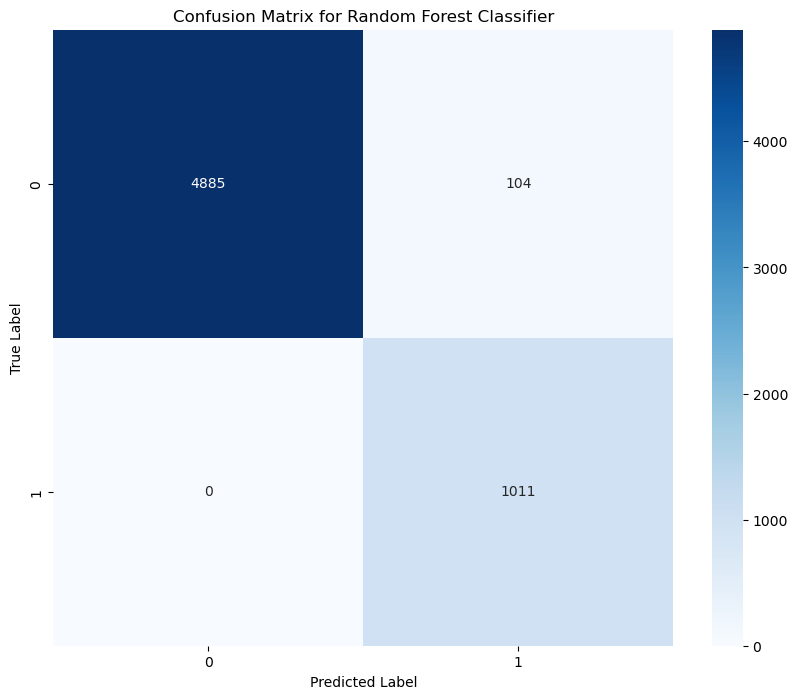

In [56]:
# Calculate confusion matrix for Random Forest predictions
rf_confusion = confusion_matrix(y_test1, rf_y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rf_confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

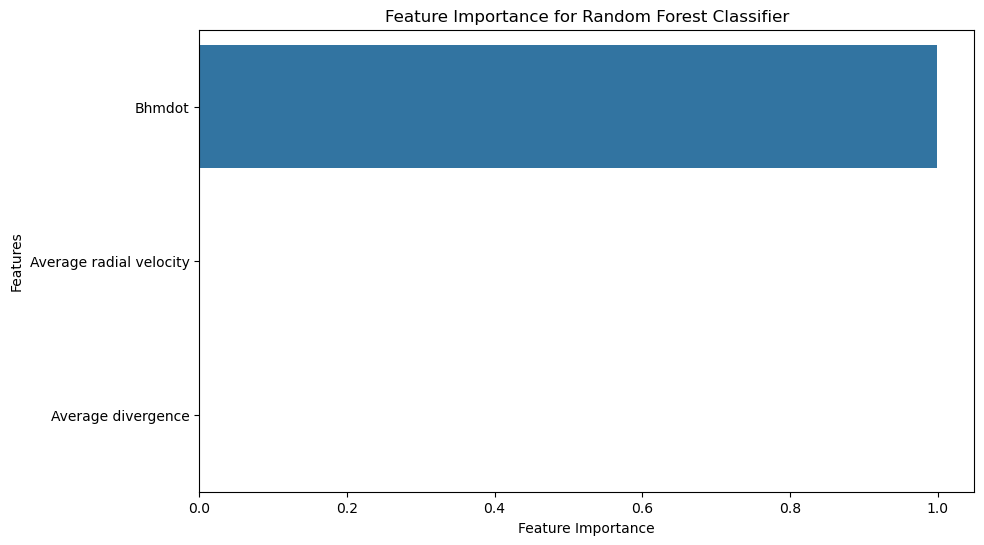

In [57]:
# Extract feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Pair feature names with their importance scores
features_list = X1.columns.tolist()
feature_importance_pairs = list(zip(features_list, feature_importance))

# Sort the feature importances in descending order
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[1] for item in sorted_feature_importance], y=[item[0] for item in sorted_feature_importance])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

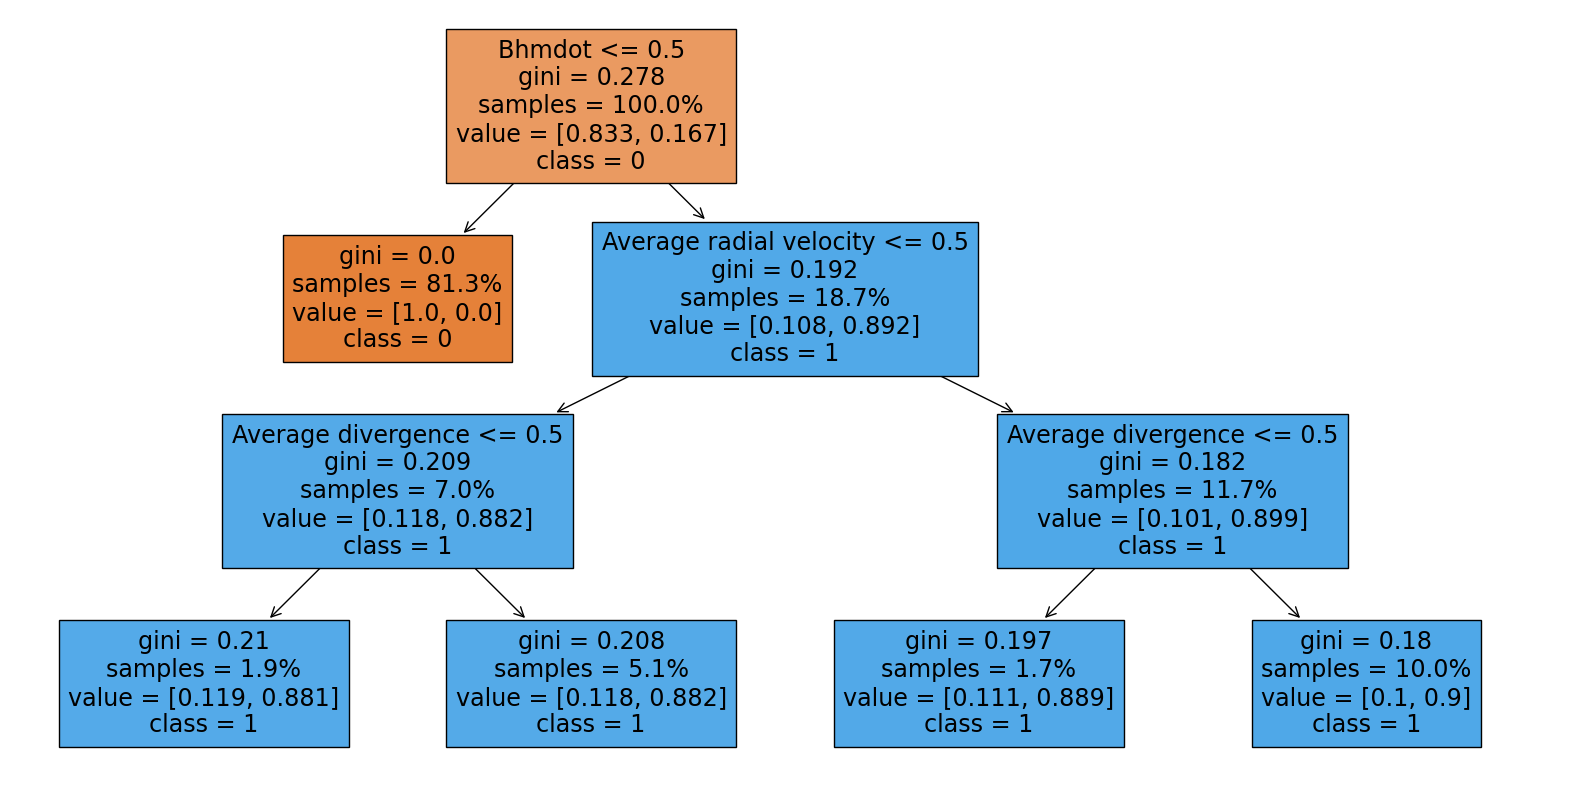

In [60]:
# Convert the Pandas Index to a list
feature_names_list = X_train1.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=feature_names_list, class_names=['0', '1'], proportion=True)
plt.show()

In [61]:
# Train a simple decision tree
tree_clf = DecisionTreeClassifier(max_depth=3)  # Setting max_depth to 3 for visualization purposes
tree_clf.fit(X_train1, y_train1)

# Predict
tree_y_pred = tree_clf.predict(X_test1)
tree_acc = accuracy_score(y_test1, tree_y_pred)


tree_acc

0.9826666666666667

In [62]:
# Parameters grid for RandomForest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomForest
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train1, y_train1)

# Best parameters and score for RandomForest
best_params_rf, best_score_rf = grid_search_rf.best_params_, grid_search_rf.best_score_
best_params_rf, best_score_rf

Fitting 3 folds for each of 54 candidates, totalling 162 fits


({'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 50},
 0.9798333333333332)

In [63]:
# Splitting the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled1, y_resampled1 = smote.fit_resample(X_train1, y_train1)

# Train a logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled1, y_resampled1)
lr_preds = lr.predict(X_test1)

# Train a Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train1, y_train1)
brf_preds = brf.predict(X_test1)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test1, lr_preds))
print("Accuracy:", accuracy_score(y_test1, lr_preds))
print("\nBalanced Random Forest:")
print(classification_report(y_test1, brf_preds))
print("Accuracy:", accuracy_score(y_test1, brf_preds))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4989
           1       0.91      1.00      0.95      1011

    accuracy                           0.98      6000
   macro avg       0.95      0.99      0.97      6000
weighted avg       0.98      0.98      0.98      6000

Accuracy: 0.9826666666666667

Balanced Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4989
           1       0.91      1.00      0.95      1011

    accuracy                           0.98      6000
   macro avg       0.95      0.99      0.97      6000
weighted avg       0.98      0.98      0.98      6000

Accuracy: 0.9826666666666667


### model 3

In [214]:
km_huang = KModes(n_clusters=2, init="Huang", n_init=1)
fitClusters_huang = km_huang.fit_predict(data)
fitClusters_huang

array([1, 1, 0, ..., 1, 1, 1], dtype=uint16)

In [215]:
data1 = data.copy().reset_index()
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data1, clustersDf], axis=1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis=1)
print(combinedDf['cluster_predicted'].value_counts())

cluster_predicted
1    19283
0    10717
Name: count, dtype: int64


In [216]:
cluster_summary = combinedDf.groupby('cluster_predicted').describe()
print(cluster_summary)

                  E_feed                   Average divergence              
                   count unique top   freq              count unique top   
cluster_predicted                                                          
0                  10717      2   0  10386              10717      2   1  \
1                  19283      2   0  14593              19283      2   1   

                              λ                    
                    freq  count unique top   freq  
cluster_predicted                                  
0                   8577  10717      1   0  10717  
1                  16122  19283      1   1  19283  


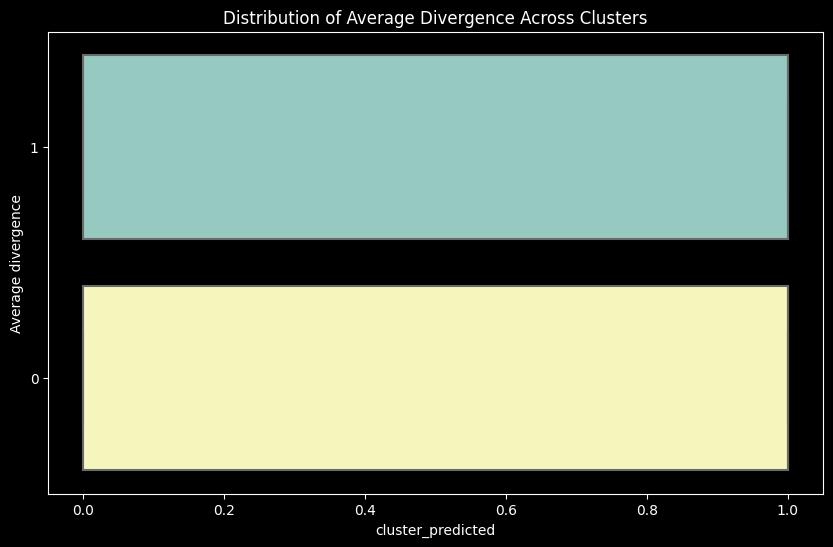

In [217]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_predicted', y='Average divergence', data=combinedDf)
plt.title('Distribution of Average Divergence Across Clusters')
plt.show()

<Axes: xlabel='λ', ylabel='count'>

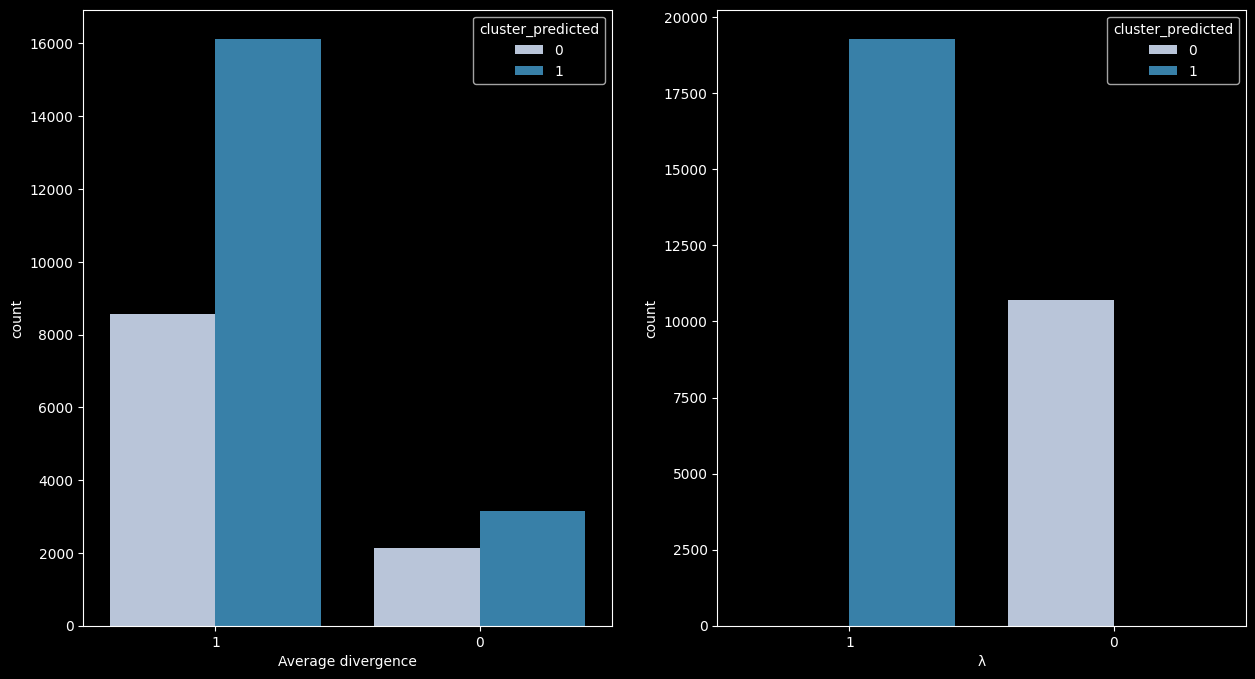

In [218]:
f, axs = plt.subplots(1,2,figsize = (15,8))
sns.countplot(x=combinedDf['Average divergence'],
              order=combinedDf['Average divergence'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])

sns.countplot(x=combinedDf['λ'],
              order=combinedDf['λ'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])

#### Model 4

In [219]:
# Resampling
E_feed_0 = data[data.E_feed=='0']
E_feed_1 = data[data.E_feed=='1']
E_feed_0_downsampled = resample(E_feed_0, replace=False, n_samples=len(E_feed_1), random_state=42)
data_downsampled = pd.concat([E_feed_0_downsampled, E_feed_1])

# Splitting the data
X_downsampled = data_downsampled.drop('E_feed', axis=1)
y_downsampled = data_downsampled['E_feed']

res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.25, random_state=42)

res_X_train.shape, res_X_test.shape

((7531, 2), (2511, 2))

In [220]:
# Define the cm_plot function to plot confusion matrix
def cm_plot(var):
    plt.figure(figsize=(15,5))
    plt.style.use('dark_background')
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='tab20')
    classNames = ['Class 0','Class 1']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual\n')
    plt.xlabel('Predicted\n')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center', 
                     color='black')
    plt.show()

In [221]:
#Try modeling using  different classification models
classifiers = [
    BaggingClassifier(max_features=X_downsampled.shape[1], n_estimators=500, random_state=42),
    AdaBoostClassifier( n_estimators=500, learning_rate=0.05, random_state=42),
    RandomForestClassifier(criterion='entropy', max_depth=40,max_features=X_downsampled.shape[1], 
                           min_samples_split=8, n_estimators=500, random_state=42),
    LGBMClassifier(learning_rate =0.03, max_depth=40, min_child_samples=10,
                   n_estimators=500, num_leaves=50, random_state = 42),
    XGBClassifier(learning_rate=0.05, n_estimators=500, subsample= 1,random_state = 42,
                        gamma = 1, max_depth=40, eval_metric='logloss')]
    
    


#putting results in df
res_cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
# Now, running the classification loop again
results = pd.DataFrame(columns=res_cols)





BaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.4675%
Cross validation scores: 0.672818298027854
Log Loss: 0.6102823650360429


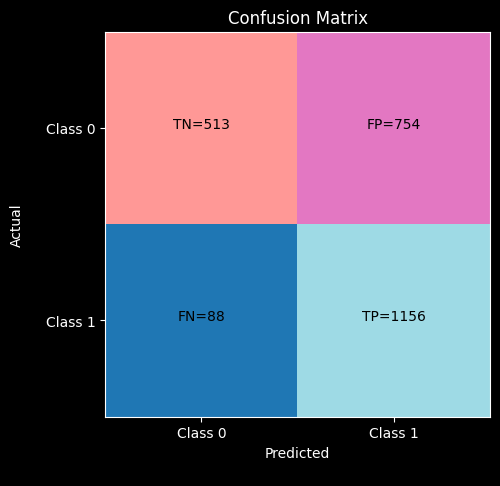





AdaBoostClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.4675%
Cross validation scores: 0.672818298027854
Log Loss: 0.6855763393381218


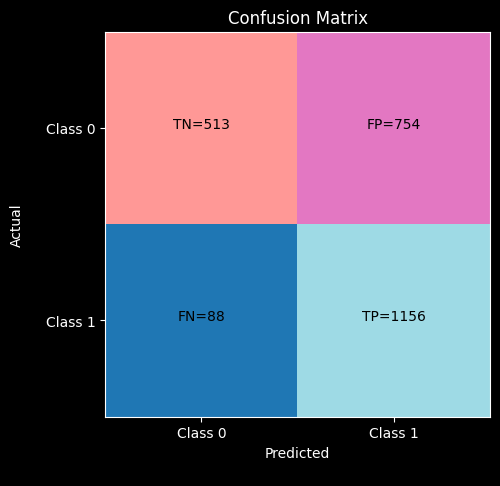





RandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.4675%
Cross validation scores: 0.672818298027854
Log Loss: 0.6102823650360429


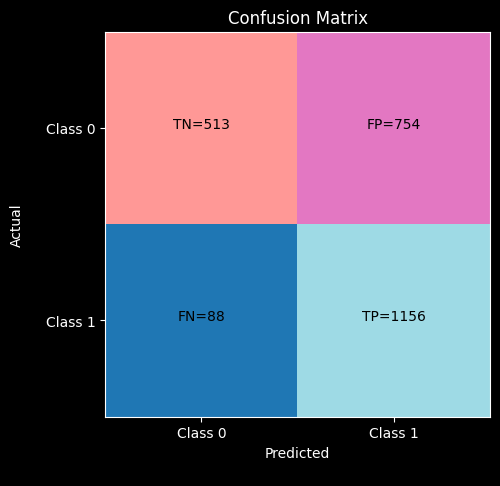





LGBMClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.4675%
Cross validation scores: 0.672818298027854
Log Loss: 0.610230996522067


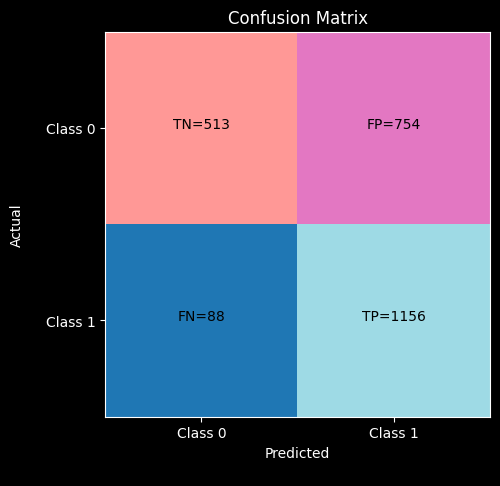





XGBClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.4675%
Cross validation scores: 0.672818298027854
Log Loss: 0.6098397992262133


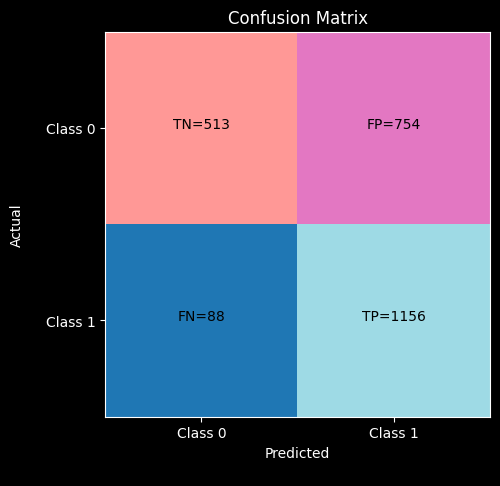

****************************************


,Classifier,Accuracy,Log Loss,Cross Val,Recall,Roc Auc,F1,False Positive Rate,Error Rate
0,BaggingClassifier,66.468,0.610,67.282,92.926,66.708,73.304,59.511,33.532
1,AdaBoostClassifier,66.468,0.686,67.282,92.926,66.708,73.304,59.511,33.532
2,RandomForestClassifier,66.468,0.610,67.282,92.926,66.708,73.304,59.511,33.532
3,LGBMClassifier,66.468,0.610,67.282,92.926,66.708,73.304,59.511,33.532
4,XGBClassifier,66.468,0.610,67.282,92.926,66.708,73.304,59.511,33.532


In [225]:
# Convert the 'Average divergence' and 'λ' columns to integers
res_X_train['Average divergence'] = res_X_train['Average divergence'].astype(int)
res_X_test['Average divergence'] = res_X_test['Average divergence'].astype(int)
res_X_train['λ'] = res_X_train['λ'].astype(int)
res_X_test['λ'] = res_X_test['λ'].astype(int)

# Training and evaluating classifiers again
results = pd.DataFrame(columns=res_cols)

for clf in classifiers:
    clf.fit(res_X_train, res_y_train)
    name = clf.__class__.__name__
    
    print("\n"*3)
    print(name,"Results:")
       
    print('~'*40)
    y_pred = clf.predict(res_X_test)
    acc = accuracy_score(res_y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    cv = np.mean(cross_val_score(clf, res_X_train, res_y_train, cv=3))
    print("Cross validation scores:",cv)
    
    train_predictions = clf.predict_proba(res_X_test)
    logloss = log_loss(res_y_test, train_predictions)
    print("Log Loss: {}".format(logloss))
    
    cm = confusion_matrix(res_y_test, y_pred)
    cm_plot(cm)
    
    # FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(res_y_test,y_pred).ravel()
    
    fpr = fp/(tn+fp)
    ers = 1-acc
    rec = recall_score(res_y_test, y_pred)
    roc = roc_auc_score(res_y_test, y_pred)
    f1s = f1_score(res_y_test, y_pred)
    results_final = pd.DataFrame([[name, round(acc*100,3), round(logloss,3), 
                                   round(cv*100,3), round(rec*100,3), round(roc*100,3),
                                   round(f1s*100,3),round(fpr*100,3),round(ers*100,3)]],
                                 columns=res_cols)
    results = pd.concat([results, results_final], ignore_index=True)

print("*"*40)
results

In [226]:
# Check if the predictions from the models are the same

# List to store the predictions of each model
all_predictions = []

for clf in classifiers:
    y_pred = clf.predict(res_X_test)
    all_predictions.append(y_pred)

# Check if all predictions are the same
are_all_predictions_same = all(np.array_equal(all_predictions[0], pred) for pred in all_predictions)
are_all_predictions_same

True

In [227]:
# Checking the balance of the classes in the resampled training data
res_y_train.value_counts()

E_feed
1    3777
0    3754
Name: count, dtype: int64

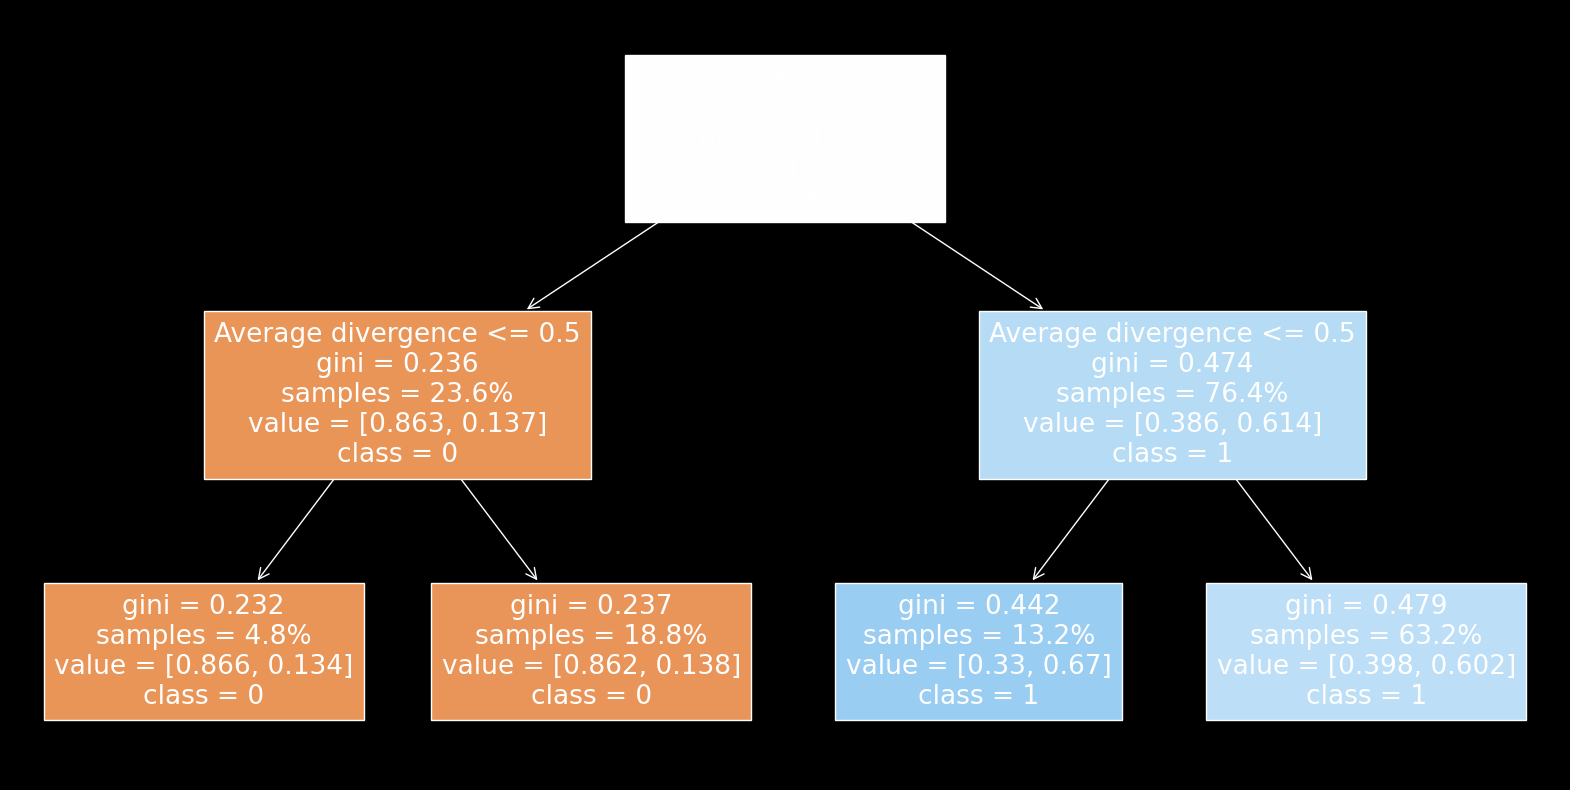

0.6646754281162883

In [228]:
# Train a simple decision tree
tree_clf = DecisionTreeClassifier(max_depth=3)  # Setting max_depth to 3 for visualization purposes
tree_clf.fit(res_X_train, res_y_train)

# Predict
tree_y_pred = tree_clf.predict(res_X_test)
tree_acc = accuracy_score(res_y_test, tree_y_pred)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=res_X_train.columns, class_names=['0', '1'], proportion=True)
plt.show()

tree_acc

In [229]:
# Extracting feature importance from the trained decision tree classifier
feature_importance = classifiers[2].feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': res_X_train.columns,
    'Importance': feature_importance
})

# Sorting the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
1,λ,0.986188
0,Average divergence,0.013812


In [230]:
# Parameters grid for RandomForest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomForest
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search_rf.fit(res_X_train, res_y_train)

# Best parameters and score for RandomForest
best_params_rf, best_score_rf = grid_search_rf.best_params_, grid_search_rf.best_score_
best_params_rf, best_score_rf

Fitting 3 folds for each of 54 candidates, totalling 162 fits


({'max_depth': 10,
  'max_features': 'auto',
  'min_samples_split': 2,
  'n_estimators': 50},
 0.672818298027854)

In [231]:
# Define the hyperparameters for LGBM
lgbm_param_grid = {
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [100, 500],
    'max_depth': [10, 20, 40],
    'num_leaves': [20, 50]
}

# Create the Grid Search object
lgbm_grid_search = GridSearchCV(LGBMClassifier(random_state=42), lgbm_param_grid, 
                                scoring='accuracy', cv=3, n_jobs=-1)

# Fit the data
lgbm_grid_search.fit(res_X_train, res_y_train)

# Get the best hyperparameters and their corresponding accuracy
lgbm_best_params = lgbm_grid_search.best_params_
lgbm_best_score = lgbm_grid_search.best_score_

lgbm_best_params, lgbm_best_score

({'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 100,
  'num_leaves': 20},
 0.672818298027854)

In [232]:
# Defining hyperparameters for XGBClassifier
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 500],
    'max_depth': [5, 10, 20],
    'gamma': [0.5, 1, 1.5],
    'subsample': [0.6, 0.8, 1.0]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_grid_search = GridSearchCV(xgb_clf, xgb_param_grid, 
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

xgb_grid_search.fit(res_X_train, res_y_train)

xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_

xgb_best_params, xgb_best_score

Fitting 3 folds for each of 243 candidates, totalling 729 fits


({'gamma': 0.5,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 50,
  'subsample': 0.6},
 0.672818298027854)

#### Model 5

In [6]:
# Reload the dataset
data_path = "Z.csv"
data = pd.read_csv(data_path)

In [7]:
#create E_feed grouping

def Feedback(num_E):
    if num_E >= 44:
        return "1"
    elif num_E < 44:
        return "0"
    
# Gas_Flow_Direction

def Gas_Flow_Direction(num_D):
    if num_D < 0:
        return "1"
    elif num_D >= 0 :
        return "0"
    
def Bhmdot(num_B):
    if num_B >= 23.7:
        return "1"
    elif num_B < 23.7 :
        return "0"   

In [8]:
#apply function   
data['E_feed']= data['E_feed'].apply(Feedback)

#apply function   
data['Average divergence']= data['Average divergence'].apply(Gas_Flow_Direction)

#apply function   
data['Average radial velocity']= data['Average radial velocity'].apply(Gas_Flow_Direction)

#apply function   
data['Bhmdot']= data['Bhmdot'].apply(Bhmdot)  

In [9]:
# Drop specified columns
data = data.drop(['ID', 'L_bol', 'SFRinhalfrad', 'Blackhole Masses', 'MSFR', 'λ', 'UV_Band', 'z'], axis=1)

In [10]:
data.head()

,E_feed,Average divergence,Bhmdot,Average radial velocity
0,0,1,0,1
1,0,1,0,0
2,0,1,0,1
3,0,0,0,0
4,0,1,0,1


In [11]:
# Features and target
X = data.drop(columns='E_feed')
y = data['E_feed']

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2,  random_state=42)

X_train.shape, X_test.shape

((24000, 3), (6000, 3))

In [12]:
# Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Define the number of epochs
epochs = 50

# Convert E_feed to integer type if it's not already
if data['E_feed'].dtype != 'int64':
    data['E_feed'] = data['E_feed'].astype(int)
    
    
# Features and target extraction
X = data.drop(columns='E_feed')
y = data['E_feed']


# Normalize the features and split the data again
X_normalized = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

test_accuracy

Epoch 1/50
600/600 [==============================] - 3s 4ms/step - loss: 0.1341 - accuracy: 0.9536 - val_loss: 0.0630 - val_accuracy: 0.9817
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0670 - accuracy: 0.9794 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 0.0770 - val_accuracy: 0.9817
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0612 - val_accuracy: 0.9817
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0662 - accuracy: 0.9794 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0659 - accuracy: 0.9794 - val_loss: 0.0608 - val_accuracy: 0.9817
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0658 - accuracy: 0.9794 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 

0.9826666712760925

In [14]:
# Enhanced model architecture
enhanced_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the enhanced model
enhanced_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
enhanced_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [15]:
history_enhanced = enhanced_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
600/600 [==============================] - 3s 4ms/step - loss: 0.1260 - accuracy: 0.9571 - val_loss: 0.0609 - val_accuracy: 0.9817
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0704 - accuracy: 0.9792 - val_loss: 0.0605 - val_accuracy: 0.9817
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0606 - val_accuracy: 0.9817
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0686 - accuracy: 0.9794 - val_loss: 0.0620 - val_accuracy: 0.9817
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0671 - accuracy: 0.9793 - val_loss: 0.0634 - val_accuracy: 0.9817
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0680 - accuracy: 0.9794 - val_loss: 0.0623 - val_accuracy: 0.9817
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0673 - accuracy: 0.9794 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 

In [16]:
test_loss_enhanced, test_accuracy_enhanced = enhanced_model.evaluate(X_test, y_test)
print(test_accuracy_enhanced)

188/188 [==============================] - 1s 2ms/step - loss: 0.0579 - accuracy: 0.9827
0.9826666712760925


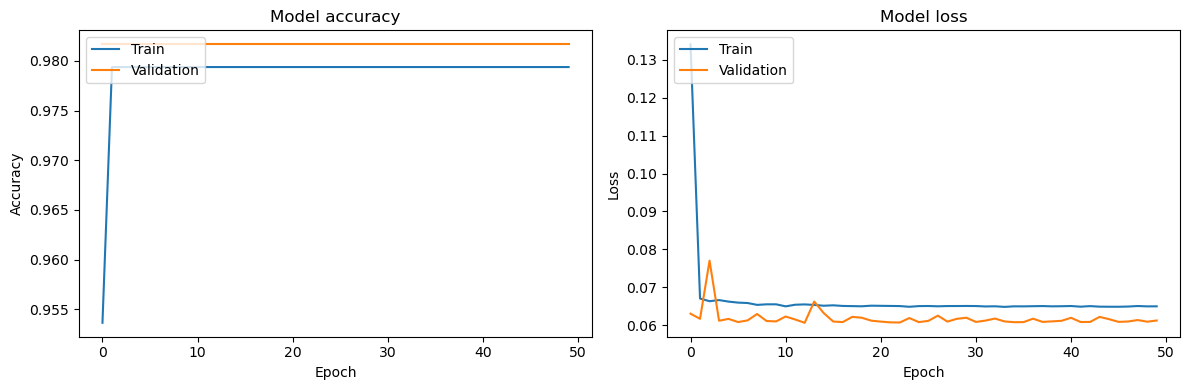

In [17]:
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Assuming 'history' is the returned object from the model.fit() method
plot_training_history(history)

In [18]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]  # Convert probabilities to class labels

# Print classification report
print(classification_report(y_test, y_pred))

188/188 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4989
           1       0.91      1.00      0.95      1011

    accuracy                           0.98      6000
   macro avg       0.95      0.99      0.97      6000
weighted avg       0.98      0.98      0.98      6000



Overall, the model doesn't seem to be overfitting, but it does appear to be underfitting. Underfitting occurs when a model is too simple to capture the underlying structure of the data

In [19]:
# Create a more complex model
def create_complex_model():
    model = Sequential()
    
    # Input layer
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    
    # Hidden layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(64, activation='relu'))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

complex_model = create_complex_model()
complex_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16897 (66.00 KB)
Trainable params: 16897 (66.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history_complex = complex_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
1200/1200 [==============================] - 5s 3ms/step - loss: 0.0824 - accuracy: 0.9732 - val_loss: 0.0610 - val_accuracy: 0.9817
Epoch 2/50
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0673 - accuracy: 0.9794 - val_loss: 0.0612 - val_accuracy: 0.9817
Epoch 3/50
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0667 - accuracy: 0.9794 - val_loss: 0.0609 - val_accuracy: 0.9817
Epoch 4/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0661 - accuracy: 0.9794 - val_loss: 0.0605 - val_accuracy: 0.9817
Epoch 5/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0661 - accuracy: 0.9794 - val_loss: 0.0606 - val_accuracy: 0.9817
Epoch 6/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0658 - accuracy: 0.9794 - val_loss: 0.0607 - val_accuracy: 0.9817
Epoch 7/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0659 - accuracy: 0.9794 - val_loss: 0.0610 - val_accuracy:

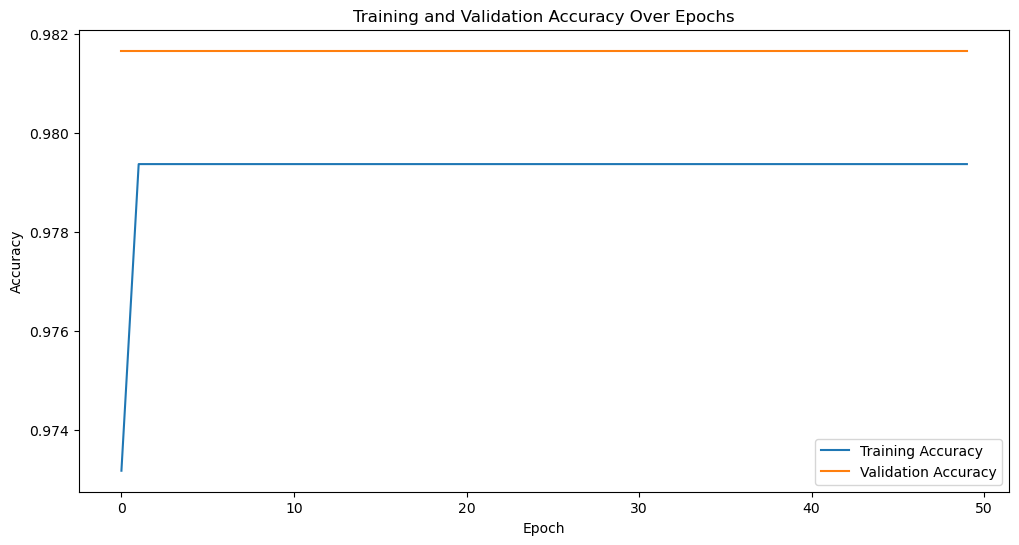

In [23]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))

plt.plot(history_complex.history['accuracy'], label='Training Accuracy')
plt.plot(history_complex.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()